#   치매란?
*   특정 질병이 아닌 정상적으로 생활해오던 사람이 다양한 원인으로 인해 뇌기능이 손상되어 기역력, 사고력, 판단력 등이 일상행활에 지장을 줄 정도로 감소하는 증상을 통칭하는 용어
*   시간이 흐를수록 증상이 점진적으로 악화되는 경향이 있음.
*   알츠하이머병이 치매의 가장 흔한 유형이며, 전체 치매의 약 60-80%를 차지함
*   그 외로는 혈관성 치매, 루이소체 치매, 전측두엽 치매 등이 있음
*   하나만의 원인이 아닌 여러 유형의 치매가 동시에 존재할 수 있음
*   과거에는 노화로 인해 발생하는 질환으로 여겨져왔으나 최근은 유전, 습관, 생활 방식 등 여러 원인이 복합적으로 작용한다고 알려짐
*   진단은 주로 문진 또는 인지 기능 검사로 진행하며, 신체검사/혈액검사(갑상선, 비타민, 전해질 등 이상 확인), 신경영상 검사(CT, MRI 등)를 통하여 진단함
*   증상 완화 약물(콜린성 약물, NMDA 수용체 조절 약물 등)이 존재하며, 초기 및 중기 치매를 완화 시킬수 있음
*   치매의 약 45%는 생활습관 개선 등으로 예방하거나 발병을 지연시킬 수 있음
*   초기 증상으로 기역력 저하, 건방증 등
*   중기 증상으로 언어 구사 문제, 시간/공간 감각 혼란, 판단력 저하, 일상생활 수행 곤란 등
*   말기 증상으로 신체 기능 유지가 어려워져 돌봄이 필요해짐
*   예방은 식습관 개선, 혈압, 혈당, 콜레스테롤 조절, 금주, 금연 등 일상생활 개선이 필요하며
*   신체 활동, 인지 자극 활동, 사회적 활동 등 뇌기능 자극을 통하여 예방 또는 발병지연이 가능하다.

### 참고문헌

1.   [Centers for Disease Control and Prevention(CDC, 미국 질병통제예방센터): Alzheimer's Disease and Dementia](https://www.cdc.gov/alzheimers-dementia/about/)
2.   [서울대학교병원 의학정보: 치매](https://terms.naver.com/entry.naver?docId=927317&cid=51007&categoryId=51007)

공통 특징: 휴식시간(ex.낮잠)이 길어질수록 잠들기에 걸리는 시간과 얕은잠이 늘어난다
'activity_rest'
'sleep_duration', 'sleep_light'

치매환자 특징: 활동량이 줄어들 수록 잠을 못자는 그런 경향을 보임
'activity_low','activity_medium', 'activity_high', 'activity_total'
'sleep_total', 'sleep_light', 'sleep_deep'
sleep_midpoint_at_delta

휴식 vs 잠드는데 드는 시간
활동 vs 수면



[('activity_inactivity_alerts', 133.47790690477666),
 ('activity_low', 132.111794797379),
 ('activity_score_meet_daily_targets', 162.66371803156576),
 ('sleep_midpoint_at_delta', 65.48759324682621),
 ('sleep_temperature_deviation', 31.56843018000881)]


## 세팅

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 폰트 입력
plt.rcParams['font.family']= 'Malgun Gothic'
# 마이터스 부호 사용
plt.rcParams['axes.unicode_minus'] = False

# ✅ Seaborn 스타일에도 적용
sns.set_theme(style="whitegrid", font="Malgun Gothic", font_scale=1.1)

### 같은 이름의 3개의 파일이 같은 파일인지 확인

In [4]:
# 데이터 로드
tr_lab_df1 = pd.read_csv(r"01.데이터\1.Training\라벨링데이터\1.걸음걸이\training_label.csv")
tr_lab_df2 = pd.read_csv(r"01.데이터\1.Training\라벨링데이터\2.수면\training_label.csv")
tr_lab_df3 = pd.read_csv(r"01.데이터\1.Training\라벨링데이터\3.인지기능\training_label.csv")

In [5]:
# 라벨링 데이터 3개가 같은 데이터인지 확인
all_equal = tr_lab_df1.equals(tr_lab_df2) and tr_lab_df2.equals(tr_lab_df3)
print(all_equal)  

True


## SAMPLE_EMAIL
*   각 환자들의 이메일, ID로 사용될 수 있음

### DIAG_NM
*   각 환자들의 상태를 라벨링 한 데이터로 확인됨
*   CN(Cognitively Normal): 정상 인지 상태
*   MCI(Mild Cognitive Impairment): 경도 인지 장애
*   Dem(Dementia): 치매

##### 참고문헌
*   [Dementia and Cognitive Impairment: Epidemiology, Diagnosis, and Treatment](https://pmc.ncbi.nlm.nih.gov/articles/PMC4104432/)

In [6]:
tr_lab_df = pd.read_csv(r"01.데이터\1.Training\라벨링데이터\1.걸음걸이\training_label.csv")

In [7]:
# 데이터 타입 확인
tr_lab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SAMPLE_EMAIL  141 non-null    object
 1   DIAG_NM       141 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [8]:
# EMAIL확인 키로 사용될 수 있음
len(tr_lab_df['SAMPLE_EMAIL'].unique())

141

In [9]:
# 검진 결과가 들어있는 데이터로 확인
tr_lab_df['DIAG_NM'].unique()

array(['CN', 'MCI', 'Dem'], dtype=object)

##  train_actovoty
*   각 환자들의 일별 활동 정보를 
*   141명의 actovoty정보가 들어있음
*   결측치, 중복은 없음
*   activity_day_end, activity_day_start: 시계열 데이터, 활동 시작 및 종료 시간 
*   activity_class_5min, activity_met_1min: ...으로 비어있는 데이터 데이터베이스에서 BLOB타입 데이터를 꺼내면서 소실된 것으로 확인
*   CONVERT(activity_class_5min USING utf8), CONVERT(activity_met_1min USING utf8): 소실된 BLOB타입 데이터를 UTF8으로 컨버팅하여 꺼낸 데이터로 확인
*   activity_class_5min: 하루 5분 당 활동 수준의 로그로 5분단위로 상태를 1, 2, 3, 4로 저장
*   activity_met_1min: 하루 1분당 MET로그
*   MET란 Metabolic Equivalent of Task[by CDC](https://www.cdc.gov/physical-activity-basics/measuring/index.html?utm_source=chatgpt.com)의 약자로 신체 활동의 강도를 나타내는 단위
*   안정시의 에너지 소모량을 1로 1MET는 3.5ml O₂/kg/min 정도 된다
*   1MET는 가만히 앉아있는 소모데는 에너지 또는 산소량
*   3~5.9MET는 중강도 신체활동
*   6MET 이상은 고강도 신체활동을 뜻한다. 
*   CONVERT된 데이터는 vecter로 변환
*   주간 운동 총량을 채운다면 몰아서 하든 나누어 하든 얻는 건강상 이점의 차이점이 없는것으로 보임[doi:10.1001/jamainternmed.2022.2488](https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/2794038?)

In [10]:
# 데이터 로드
tr_act_df = pd.read_csv(r"01.데이터\1.Training\원천데이터\1.걸음걸이\train_activity.csv")
tr_sle_df = pd.read_csv(r"01.데이터\1.Training\원천데이터\2.수면\train_sleep.csv")
tr_mmse_df = pd.read_csv(r"01.데이터\1.Training\원천데이터\3.인지기능\train_mmse.csv")

In [11]:
# 데이터 프레임 정보 확인
tr_act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EMAIL                                    9705 non-null   object 
 1   activity_average_met                     9705 non-null   float64
 2   activity_cal_active                      9705 non-null   int64  
 3   activity_cal_total                       9705 non-null   int64  
 4   activity_class_5min                      9705 non-null   object 
 5   activity_daily_movement                  9705 non-null   int64  
 6   activity_day_end                         9705 non-null   object 
 7   activity_day_start                       9705 non-null   object 
 8   activity_high                            9705 non-null   int64  
 9   activity_inactive                        9705 non-null   int64  
 10  activity_inactivity_alerts               9705 no

In [12]:
# EMAIL의 개수 확인
len(tr_act_df['EMAIL'].unique())

141

In [13]:
# 데이터 프레임 각 컬럼에 어떠한 데이터가 들어있는지 확인
tr_act_df.head()

,EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_class_5min,activity_daily_movement,activity_day_end,activity_day_start,activity_high,activity_inactive,...,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,CONVERT(activity_class_5min USING utf8),CONVERT(activity_met_1min USING utf8)
0,nia+279@rowan.kr,1.28125,196,2251,...,3353,2020-10-20T03:59:59+09:00,2020-10-19T04:00:00+09:00,0,714,...,78,100,100,54,100,97,4212,207,1/1/2/2/2/2/1/1/1/1/1/1/1/2/2/2/2/2/2/3/3/2/2/...,1.2/0.9/1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/...
1,nia+279@rowan.kr,1.25000,145,2159,...,2516,2020-10-21T03:59:59+09:00,2020-10-20T04:00:00+09:00,0,719,...,60,100,100,58,96,96,3306,140,1/1/1/2/2/2/2/2/2/2/2/2/1/1/1/1/1/2/3/3/3/3/2/...,0.9/0.9/1.3/1/0.9/0.9/1.1/0.9/1/0.9/1/0.9/1/0....
2,nia+279@rowan.kr,1.21875,118,2140,...,1716,2020-10-22T03:59:59+09:00,2020-10-21T04:00:00+09:00,0,708,...,43,95,100,55,71,83,2550,131,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/3/3/3/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
3,nia+279@rowan.kr,1.28125,180,2240,...,2791,2020-10-23T03:59:59+09:00,2020-10-22T04:00:00+09:00,0,705,...,43,100,100,58,71,59,4009,208,1/1/1/1/1/1/1/1/1/1/2/2/2/2/3/3/3/2/3/3/3/3/3/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
4,nia+279@rowan.kr,1.46875,374,2559,...,5393,2020-10-24T03:59:59+09:00,2020-10-23T04:00:00+09:00,0,437,...,43,100,100,89,40,46,8081,517,1/1/1/2/2/2/2/2/2/1/1/1/3/2/2/1/2/2/2/3/3/2/2/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....


In [14]:
# 중복여부 확인
tr_act_df.duplicated().sum()

np.int64(0)

### object 확인
*   시간, ..., 문자열 데이터 확인
*   시작 시간, 종료 시간 으로 한 사람(EMAIL)에 대한 시계열 데이터로 구성

In [15]:
# object 타입의 데이터가 어떤 값으로 들어가 있는지 확인
obj_list = ['activity_class_5min', 'activity_day_end', 'activity_day_start', 'activity_met_1min', 'CONVERT(activity_class_5min USING utf8)', 'CONVERT(activity_met_1min USING utf8)']
tr_act_df[obj_list].head()

,activity_class_5min,activity_day_end,activity_day_start,activity_met_1min,CONVERT(activity_class_5min USING utf8),CONVERT(activity_met_1min USING utf8)
0,...,2020-10-20T03:59:59+09:00,2020-10-19T04:00:00+09:00,...,1/1/2/2/2/2/1/1/1/1/1/1/1/2/2/2/2/2/2/3/3/2/2/...,1.2/0.9/1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/...
1,...,2020-10-21T03:59:59+09:00,2020-10-20T04:00:00+09:00,...,1/1/1/2/2/2/2/2/2/2/2/2/1/1/1/1/1/2/3/3/3/3/2/...,0.9/0.9/1.3/1/0.9/0.9/1.1/0.9/1/0.9/1/0.9/1/0....
2,...,2020-10-22T03:59:59+09:00,2020-10-21T04:00:00+09:00,...,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/3/3/3/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
3,...,2020-10-23T03:59:59+09:00,2020-10-22T04:00:00+09:00,...,1/1/1/1/1/1/1/1/1/1/2/2/2/2/3/3/3/2/3/3/3/3/3/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
4,...,2020-10-24T03:59:59+09:00,2020-10-23T04:00:00+09:00,...,1/1/1/2/2/2/2/2/2/1/1/1/3/2/2/1/2/2/2/3/3/2/2/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....


In [16]:
# 각 컬럼에 ...만 들어가 있는지 확인
print(tr_act_df['activity_class_5min'].unique(), tr_act_df['activity_met_1min'].unique())

['...'] ['...']


In [17]:
# 첫번째 데이터를 꺼내어 확인
# activity_class_5min컬럼의 값을 CONVERT한 데이터로 파악됨
tr_act_df['CONVERT(activity_class_5min USING utf8)'][0]

'1/1/2/2/2/2/1/1/1/1/1/1/1/2/2/2/2/2/2/3/3/2/2/3/3/3/2/2/2/2/2/3/3/3/2/2/2/2/2/2/3/4/3/2/2/2/2/2/1/1/2/2/2/2/2/2/3/4/2/2/2/2/2/3/4/4/2/2/3/2/2/2/2/2/2/2/2/1/1/2/2/2/3/4/4/3/3/2/3/4/3/3/2/2/2/2/3/2/3/2/2/1/1/1/2/2/2/2/2/2/2/2/2/3/2/2/2/2/2/2/2/2/2/2/2/1/1/2/2/2/2/3/2/2/3/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/3/3/3/2/2/2/2/2/2/3/4/3/3/3/3/3/2/2/2/3/3/3/3/2/2/2/2/2/2/2/2/2/2/1/2/1/1/1/2/2/2/2/2/2/2/2/2/2/1/1/1/2/2/2/2/2/3/2/3/2/2/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/2/1/1/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/1/1/'

In [18]:
# /를 제거하여 숫자로 변경

def convert_int(df):
    df = str(df).strip('/')
    return [int(v) for v in df.split('/') if v]

def convert_flo(df):
    df = str(df).strip('/')
    return [float(v) for v in df.split('/') if v]

In [19]:
# 적용
tr_act_df['activity_class_5min_list'] = tr_act_df['CONVERT(activity_class_5min USING utf8)'].apply(convert_int)
tr_act_df['activity_met_1min_list'] = tr_act_df['CONVERT(activity_met_1min USING utf8)'].apply(convert_flo)


In [20]:
# 각각의 1번째 데이터의 길이 확인 및 유니크값 확인
print(len(tr_act_df['activity_class_5min_list'][0]))
print(set(tr_act_df['activity_class_5min_list'][0]))

288
{1, 2, 3, 4}


In [21]:
print(len(tr_act_df['activity_met_1min_list'][0]))
print(set(tr_act_df['activity_met_1min_list'][0]))

1440
{0.9, 1.2, 1.1, 1.3, 1.0, 1.4, 1.5, 1.6, 2.0, 1.9, 3.0, 3.2, 3.1, 4.8, 5.1, 2.5, 3.5, 4.0, 4.1, 4.4, 2.6, 2.1, 3.6, 1.7, 2.2, 2.3, 2.8, 2.7, 3.8, 3.7, 4.2, 1.8, 4.7, 5.3, 2.4, 2.9, 3.9, 3.4}


In [22]:
def datetime_set(df, cols):
    start_col, end_col = cols
    df[start_col] = pd.to_datetime(df[start_col], errors='coerce')
    df[end_col] = pd.to_datetime(df[end_col], errors='coerce')

    df['sta_year'] = df[start_col].dt.year
    df['sta_month'] = df[start_col].dt.month
    df['sta_day'] = df[start_col].dt.day
    df['sta_hour'] = df[start_col].dt.hour

    df['end_year'] = df[end_col].dt.year
    df['end_month'] = df[end_col].dt.month
    df['end_day'] = df[end_col].dt.day
    df['end_hour'] = df[end_col].dt.hour
    return df

In [23]:
# datetime 데이터 변환 및 년, 월, 일, 시간 추출
time_cols = ['activity_day_start', 'activity_day_end']
tr_act_df = datetime_set(tr_act_df, time_cols)

In [24]:
tr_act_df[['end_year','end_month','end_day','end_hour','sta_year','sta_month','sta_day','sta_hour']].head()

,end_year,end_month,end_day,end_hour,sta_year,sta_month,sta_day,sta_hour
0,2020,10,20,3,2020,10,19,4
1,2020,10,21,3,2020,10,20,4
2,2020,10,22,3,2020,10,21,4
3,2020,10,23,3,2020,10,22,4
4,2020,10,24,3,2020,10,23,4


In [25]:
''' 
# 업셈플링 두 데이터의 스케일을 같게 만들어줌
def upseampl(df_list):
    return np.repeat(df_list, 5)[:1440]
'''
# 리스트로 되어있는 값을 백터로 변환하여 연산 및 분석할 수 있게 바꿈
def BLOB_to_vecter(df, col_heart, col_MET):
    heart = np.array(df[col_heart], dtype='int')
    met = np.array(df[col_MET], dtype='float')
    return heart, met

In [26]:
heart_vec, met_vec = [], []

for _, row in tr_act_df.iterrows():
    heart, met = BLOB_to_vecter(row, 'activity_class_5min_list','activity_met_1min_list')
    heart_vec.append(heart)
    met_vec.append(met)

tr_act_df['heart_vecter'] = heart_vec
tr_act_df['met_vecter'] = met_vec

In [27]:
# 빈 데이터 및 변환 전 데이터 제거 및 저장
train_activity_v1 = tr_act_df.drop(['activity_met_1min','activity_class_5min','CONVERT(activity_class_5min USING utf8)', 'CONVERT(activity_met_1min USING utf8)'], axis=1)

In [28]:
train_activity_v1.to_csv(r"01.데이터\1.Training\원천데이터\1.걸음걸이\train_activity_v1.csv")

## train_sleep
*   각 환자들의 일별 수면 정보가 들어가 있음
*   결측, 중복은 없음
*   컬럼 중복은 존재
*   활동과 동일하게 로그 데이터가 존재
*   같은 값이 들어간 컬럼 확인, 하나를 제거
*   수면은 들쭉날쭉한 수면 패턴을 가지는것 보다 일정한 패턴을 가지는 경우가 건강한 것으로 확인됨 [doi: 10.1007/s41105-023-00460-6](https://pmc.ncbi.nlm.nih.gov/articles/PMC10900010/)
*   하지만 어느정도의 보상수면은 건강에 이득을 주는것으로 확인[DOI: 10.1093/sleep/zsad253](https://pubmed.ncbi.nlm.nih.gov/37738616/)

In [29]:
# 데이터 타입 확인
tr_sle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   EMAIL                                     9705 non-null   object 
 1   sleep_awake                               9705 non-null   int64  
 2   sleep_bedtime_end                         9705 non-null   object 
 3   sleep_bedtime_start                       9705 non-null   object 
 4   sleep_breath_average                      9705 non-null   float64
 5   sleep_deep                                9705 non-null   int64  
 6   sleep_duration                            9705 non-null   int64  
 7   sleep_efficiency                          9705 non-null   int64  
 8   sleep_hr_5min                             9705 non-null   object 
 9   sleep_hr_average                          9705 non-null   float64
 10  sleep_hr_lowest                     

In [30]:
# EMAIL수 확인
len(tr_sle_df['EMAIL'].unique())

141

In [31]:
tr_sle_df.head()

,EMAIL,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_5min,sleep_hr_average,...,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8)
0,nia+279@rowan.kr,8700,2020-10-19T05:10:28+09:00,2020-10-18T18:38:28+09:00,17.875,10110,37920,77,...,53.04,...,65,89,56,94,0.00,0.00,29220,63/61/59/58/58/58/56/55/54/53/53/53/0/0/54/57/...,4/2/2/2/2/1/1/2/2/2/2/2/4/4/4/1/1/4/4/4/2/2/2/...,18/28/25/28/34/34/35/45/54/36/36/60/0/0/34/22/...
1,nia+279@rowan.kr,6570,2020-10-20T05:37:52+09:00,2020-10-19T21:39:52+09:00,18.000,7440,28680,77,...,52.82,...,65,97,43,65,0.34,0.34,22110,0/51/0/51/52/52/52/52/53/53/53/52/52/53/53/53/...,4/2/4/2/2/2/1/1/1/2/2/3/3/3/3/3/3/3/1/1/1/4/4/...,0/49/0/38/51/17/18/18/26/27/24/29/36/31/32/34/...
2,nia+279@rowan.kr,10530,2020-10-21T05:45:28+09:00,2020-10-20T20:51:28+09:00,18.000,4620,32040,67,...,52.01,...,41,75,68,62,-0.07,-0.07,21510,54/56/0/55/53/55/56/55/0/55/54/54/54/0/0/55/55...,4/2/1/1/2/2/4/4/4/4/2/2/2/4/4/4/2/4/4/4/4/4/4/...,56/47/0/49/42/57/44/49/0/46/54/47/55/0/0/55/53...
3,nia+279@rowan.kr,4080,2020-10-22T05:12:16+09:00,2020-10-21T22:08:16+09:00,17.500,7440,25440,84,...,51.07,...,81,83,73,62,-0.14,-0.14,21360,0/54/53/53/54/54/54/53/53/53/53/54/51/50/51/51...,4/4/1/1/1/1/1/1/1/1/1/4/2/2/2/2/1/1/1/1/1/4/2/...,0/40/40/40/37/46/35/46/44/56/50/48/41/55/55/50...
4,nia+279@rowan.kr,7170,2020-10-23T02:23:30+09:00,2020-10-22T20:38:30+09:00,17.875,4320,20700,65,...,50.80,...,39,78,25,29,-0.50,-0.50,13530,0/49/50/50/50/50/50/50/51/0/0/0/0/0/0/0/0/50/5...,4/2/2/2/2/1/1/1/2/4/4/4/4/4/4/4/4/4/2/1/1/1/1/...,0/81/60/74/62/63/56/78/81/0/0/0/0/0/0/0/0/60/4...


In [32]:
# 중복 확인
tr_sle_df.duplicated().sum()

np.int64(0)

In [33]:
# 각 타입별 컬럼 분류
time_date = ['sleep_bedtime_start', 'sleep_bedtime_end']
obj_list = ['sleep_hr_5min','sleep_hypnogram_5min','sleep_rmssd_5min']
convert_list = ['CONVERT(sleep_hr_5min USING utf8)','CONVERT(sleep_hypnogram_5min USING utf8)','CONVERT(sleep_rmssd_5min USING utf8)']

In [34]:
# 데이터 타입 변환 및 년, 월, 일, 시간 추출
tr_sle_df = datetime_set(tr_sle_df, time_date)

In [35]:
tr_sle_df[obj_list].head()

,sleep_hr_5min,sleep_hypnogram_5min,sleep_rmssd_5min
0,...,...,...
1,...,...,...
2,...,...,...
3,...,...,...
4,...,...,...


In [36]:
# 각 컬럼에 다른 데이터가 있는지 확인
for i in obj_list:
    print(tr_sle_df[i].unique())

['...']
['...']
['...']


In [37]:
# 각 로그 데이터를 백터로 변환 
tr_sle_df['sleep_hr_5min_list'] = tr_sle_df['CONVERT(sleep_hr_5min USING utf8)'].apply(convert_int)
tr_sle_df['sleep_hypnogram_5min_list'] = tr_sle_df['CONVERT(sleep_hypnogram_5min USING utf8)'].apply(convert_int)
tr_sle_df['sleep_rmssd_5min_list'] = tr_sle_df['CONVERT(sleep_rmssd_5min USING utf8)'].apply(convert_int)

In [38]:
print(len(tr_sle_df['sleep_hr_5min_list'][0]), set(tr_sle_df['sleep_hr_5min_list'][0]))

127 {0, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 63}


In [39]:
print(len(tr_sle_df['sleep_hypnogram_5min_list'][0]), set(tr_sle_df['sleep_hypnogram_5min_list'][0]))

127 {1, 2, 3, 4}


In [40]:
print(len(tr_sle_df['sleep_rmssd_5min_list'][0]), set(tr_sle_df['sleep_rmssd_5min_list'][0]))

127 {0, 18, 22, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 56, 57, 60, 71, 73, 75}


In [41]:
# 같은 값으로 보이는 컬럼 확인
tr_sle_df[['sleep_temperature_delta', 'sleep_temperature_deviation']]

,sleep_temperature_delta,sleep_temperature_deviation
0,0.00,0.00
1,0.34,0.34
2,-0.07,-0.07
3,-0.14,-0.14
4,-0.50,-0.50
...,...,...
9700,-0.09,-0.09
9701,0.41,0.41
9702,0.27,0.27
9703,-0.05,-0.05


In [42]:
all_equal = tr_sle_df['sleep_temperature_delta'].equals(tr_sle_df['sleep_temperature_deviation']) 
print(all_equal)  

True


In [43]:
# 확인 후 하나 제거
drop_list = obj_list + convert_list
drop_list.append('sleep_temperature_delta')
train_sleep_v1 = tr_sle_df.drop(drop_list, axis=1)

In [44]:
train_sleep_v1.to_csv(r'01.데이터\1.Training\원천데이터\2.수면\train_sleep_v1.csv')

## train_mmse
*   각 환자들의 문진 정보와 검진 정보가 들어있음
*   DIAG_NM은 환자의 치매의 판정으로 CN(정상), MCI(경증), Dem(중증)으로 구분되고 있음
*   라벨링 데이터와 mmse의 DIAG_NM 데이터와 같아 타겟인 걸 확인
*   DOCTOR_NM은 진단자 명으로 익명화를 위해 제거된 데이터로 추측됨

In [45]:
# 데이터 타입 확인
tr_mmse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SAMPLE_EMAIL  141 non-null    object
 1   DIAG_SEQ      141 non-null    int64 
 2   DIAG_NM       141 non-null    object
 3   DOCTOR_NM     141 non-null    object
 4   MMSE_NUM      141 non-null    int64 
 5   MMSE_KIND     141 non-null    int64 
 6   Q01           141 non-null    int64 
 7   Q02           141 non-null    int64 
 8   Q03           141 non-null    int64 
 9   Q04           141 non-null    int64 
 10  Q05           141 non-null    int64 
 11  Q06           141 non-null    int64 
 12  Q07           141 non-null    int64 
 13  Q08           141 non-null    int64 
 14  Q09           141 non-null    int64 
 15  Q10           141 non-null    int64 
 16  Q11_1         141 non-null    int64 
 17  Q11_2         141 non-null    int64 
 18  Q11_3         141 non-null    int64 
 19  Q12_1   

In [46]:
tr_mmse_df.head()

,SAMPLE_EMAIL,DIAG_SEQ,DIAG_NM,DOCTOR_NM,MMSE_NUM,MMSE_KIND,Q01,Q02,Q03,Q04,...,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL
0,nia+315@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,29
1,nia+014@rowan.kr,3,MCI,-,3,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,28
2,nia+220@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
3,nia+096@rowan.kr,2,MCI,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,27
4,nia+396@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30


In [47]:
tr_mmse_df['DIAG_NM'].unique()

array(['CN', 'MCI', 'Dem'], dtype=object)

In [48]:
# 위의 mmse 데이터와 라벨링 데이터가 서로 같은지 확인
all_equal = tr_mmse_df[['SAMPLE_EMAIL','DIAG_NM']].equals(tr_lab_df) 
print(all_equal)  

True


In [49]:
# 들어간 값 확인
tr_mmse_df['DOCTOR_NM'].unique()

array(['-'], dtype=object)

In [50]:
# 빈 값 들어있는 컬럼 제거
tr_mmse_df.drop('DOCTOR_NM',axis=1, inplace=True)

In [51]:
# 간단한 EDA 진행 데이터의 통계값, 분포, 히트맵을 확인
def fst_eda(df, name):
    print(f'{name}')
    
    #통계값
    display(df.describe().T)

    # 숫자형 데이터만 선택하여 히스토그램 작성
    num_cols = df.select_dtypes(include=[np.number]).columns
    df[num_cols].hist(figsize=(25, 15), bins=30, color='skyblue')
    plt.subplots_adjust(hspace=0.6, wspace=0.3)
    plt.title(f'{name}')
    plt.show()

    # 숫자형 데이터만 선택하여 히스토그램 작성
    corr = df[num_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
    plt.title(f'{name}')
    plt.show()


## 활동 데이터
*   시작 시간과 종료 시간은 같은 값이 들어가 있는것으로 확인
*   몇몇 컬럼들이 평균과 max값이 너무 큰 차이가 난 것을 확인 -> 이상치 후보
*   연관된 데이터(활동량, 활동 칼로리량 등)가 많이 존재하는 것으로 확인

train_activity_v1


,count,mean,std,min,25%,50%,75%,max
activity_average_met,9705.0,1.470814,0.193798,0.0625,1.34375,1.4375,1.59375,4.03125
activity_cal_active,9705.0,468.230500,271.203042,0.0000,267.00000,425.0000,616.00000,2640.00000
activity_cal_total,9705.0,2505.469552,356.893669,1478.0000,2273.00000,2479.0000,2720.00000,4808.00000
activity_daily_movement,9705.0,8844.447295,5345.391611,0.0000,4868.00000,8049.0000,11815.00000,46659.00000
activity_high,9705.0,2.938588,6.447401,0.0000,0.00000,1.0000,3.00000,149.00000
activity_inactive,9705.0,511.910046,139.525639,1.0000,416.00000,506.0000,599.00000,1082.00000
activity_inactivity_alerts,9705.0,0.440082,0.758804,0.0000,0.00000,0.0000,1.00000,6.00000
activity_low,9705.0,288.133436,121.476850,0.0000,199.00000,280.0000,364.00000,861.00000
activity_medium,9705.0,52.813704,43.995877,0.0000,18.00000,44.0000,77.00000,362.00000
activity_met_min_high,9705.0,20.515507,46.723102,0.0000,0.00000,7.0000,23.00000,1090.00000


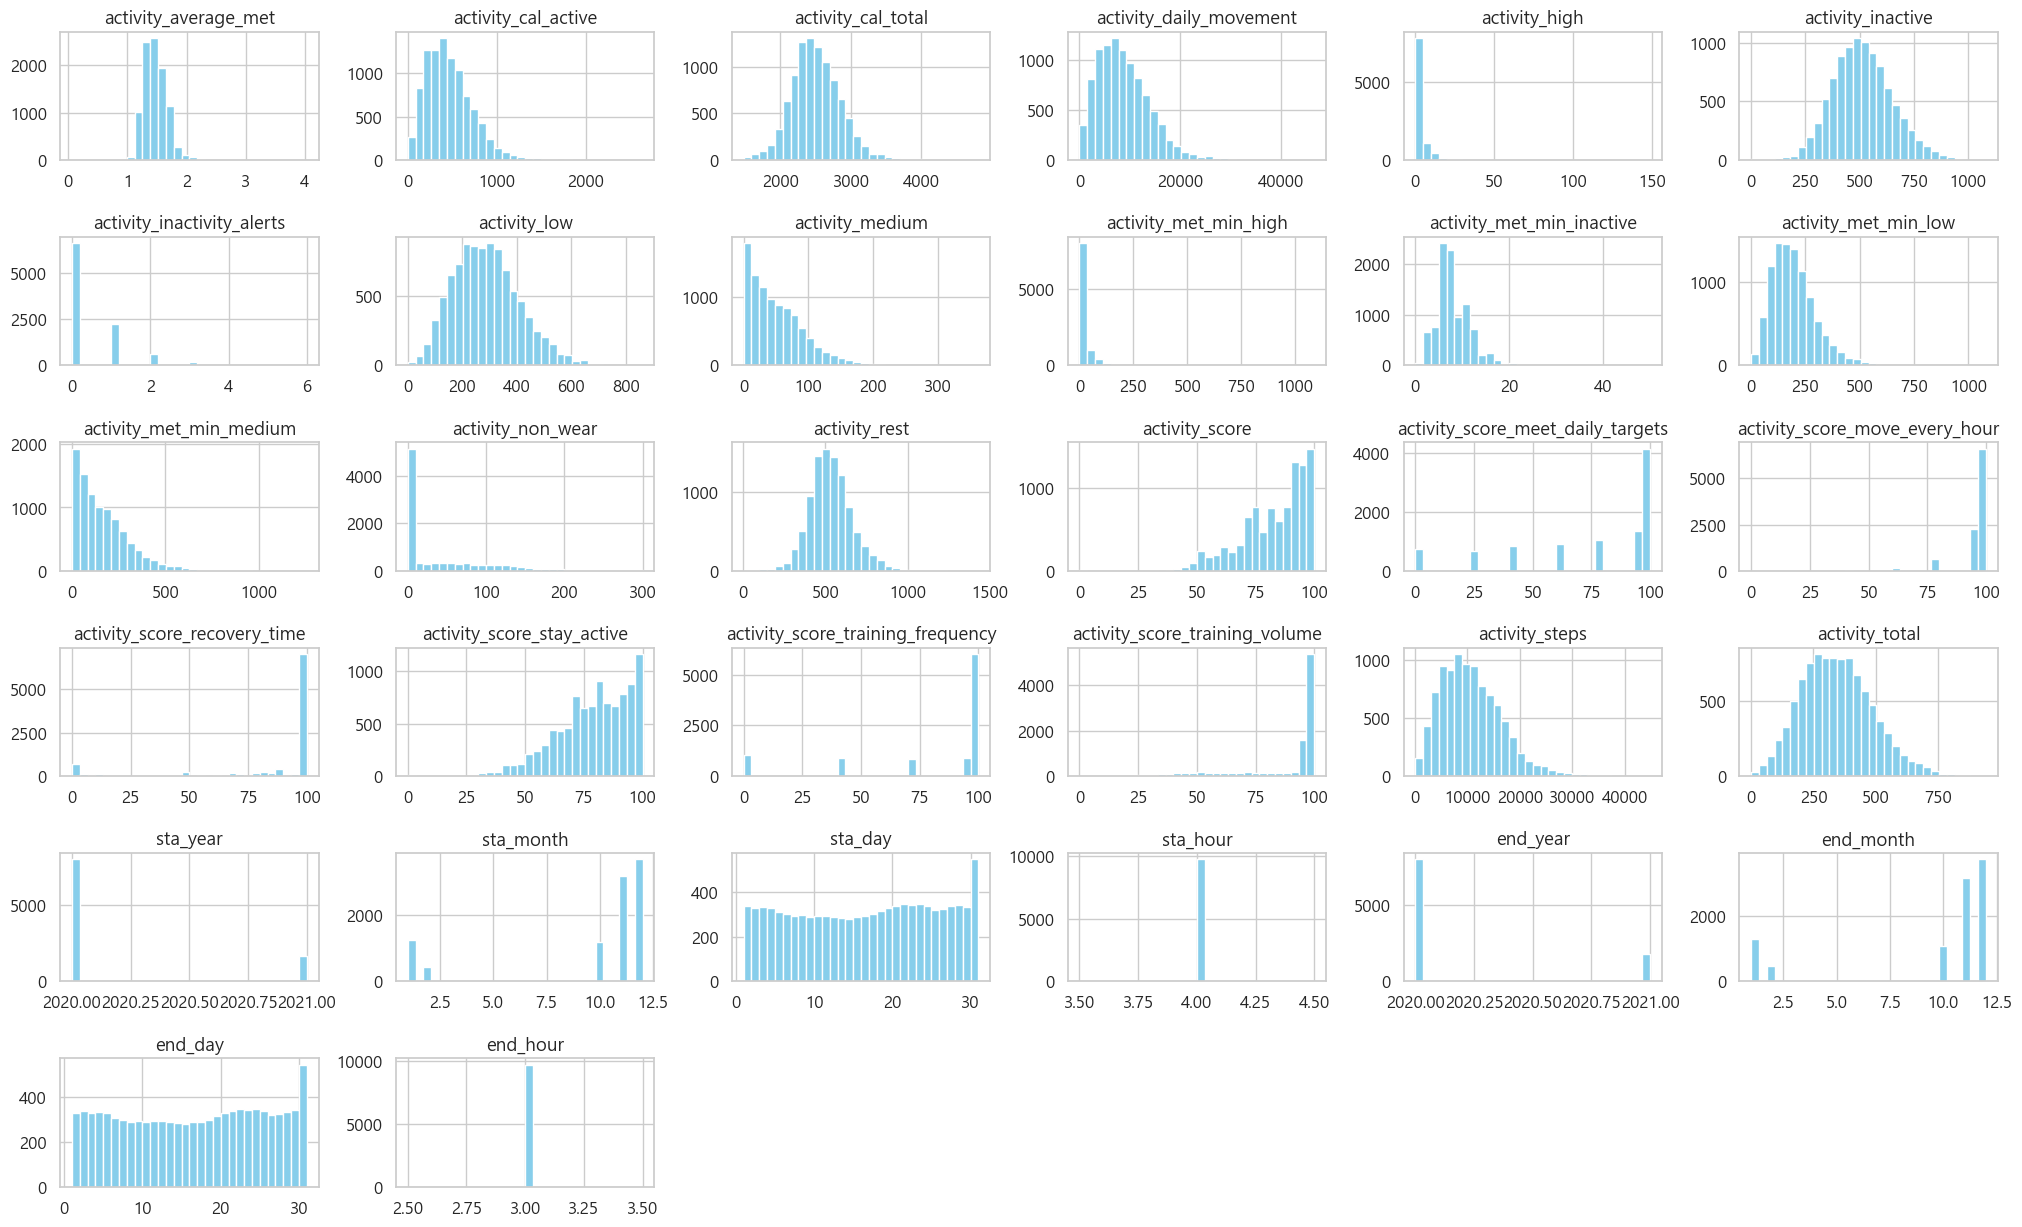

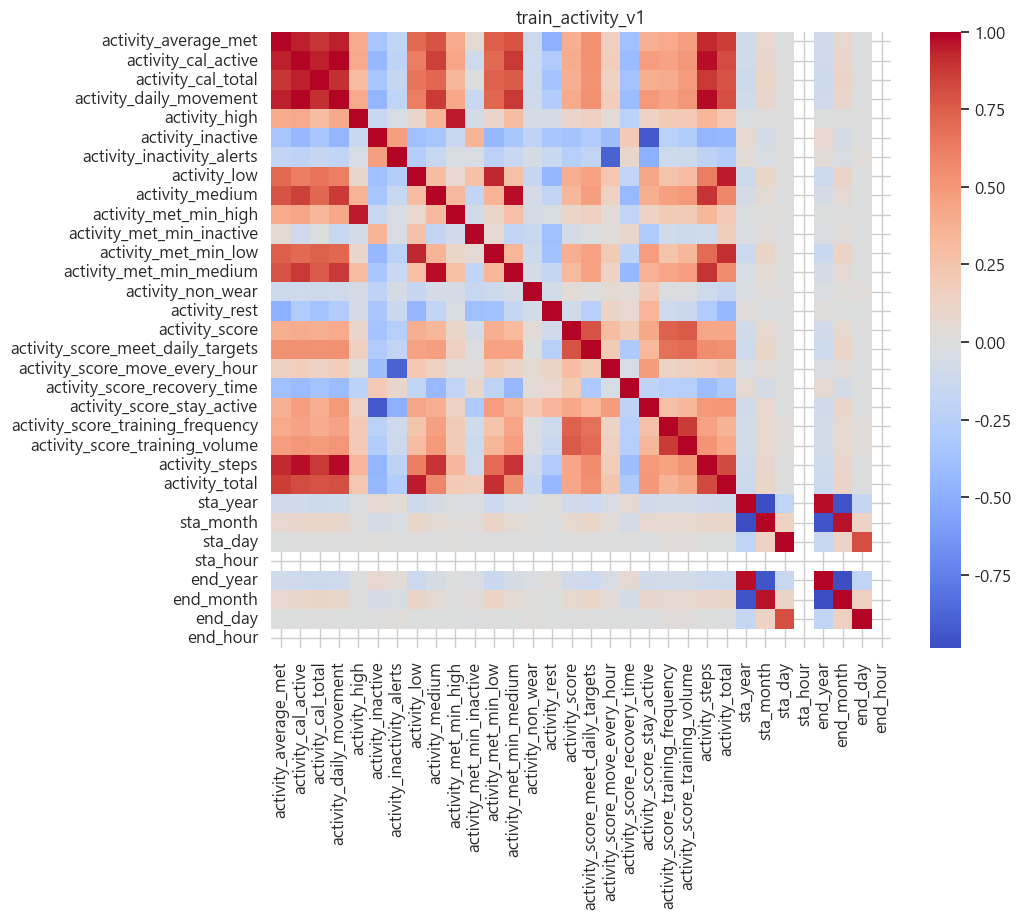

In [52]:
fst_eda(train_activity_v1, "train_activity_v1")

## 수면 데이터
*   활동과 다르게 실제 수면시간을 기준으로 시간이 시간이 기록되어 정규 분포를 가짐
*   sleep_longest는 본 수면 여부값으로 전부 본수면임
*   각 수면의 길이와 각 수면의 점수가 주 변수로 존재
*   각 수면의 길이와 점수는 높은 상관계수를 가짐
*   활동에서 처럼 극단적인 차이를 보이는 데이터는 없어보임

train_sleep_v1


,count,mean,std,min,25%,50%,75%,max
sleep_awake,9705.0,5496.389490,3453.783770,510.00,3030.00,4650.000,7050.000,26820.00
sleep_breath_average,9705.0,16.791589,1.294707,11.75,16.00,16.875,17.625,22.25
sleep_deep,9705.0,5104.166924,2621.211223,0.00,3150.00,4890.000,6720.000,15390.00
sleep_duration,9705.0,29113.706337,7097.636640,10800.00,24360.00,28800.000,33360.000,54000.00
sleep_efficiency,9705.0,81.747553,8.748557,40.00,77.00,83.000,88.000,98.00
sleep_hr_average,9705.0,60.404731,7.249047,35.90,55.28,60.130,65.160,99.99
sleep_hr_lowest,9705.0,54.929830,6.528942,33.00,50.00,55.000,59.000,91.00
sleep_is_longest,9705.0,1.000000,0.000000,1.00,1.00,1.000,1.000,1.00
sleep_light,9705.0,14836.071097,4472.616164,1500.00,11640.00,14580.000,17640.000,38190.00
sleep_midpoint_at_delta,9705.0,11470.083668,16449.217972,-9212.00,5130.00,8349.000,11897.000,98539.00


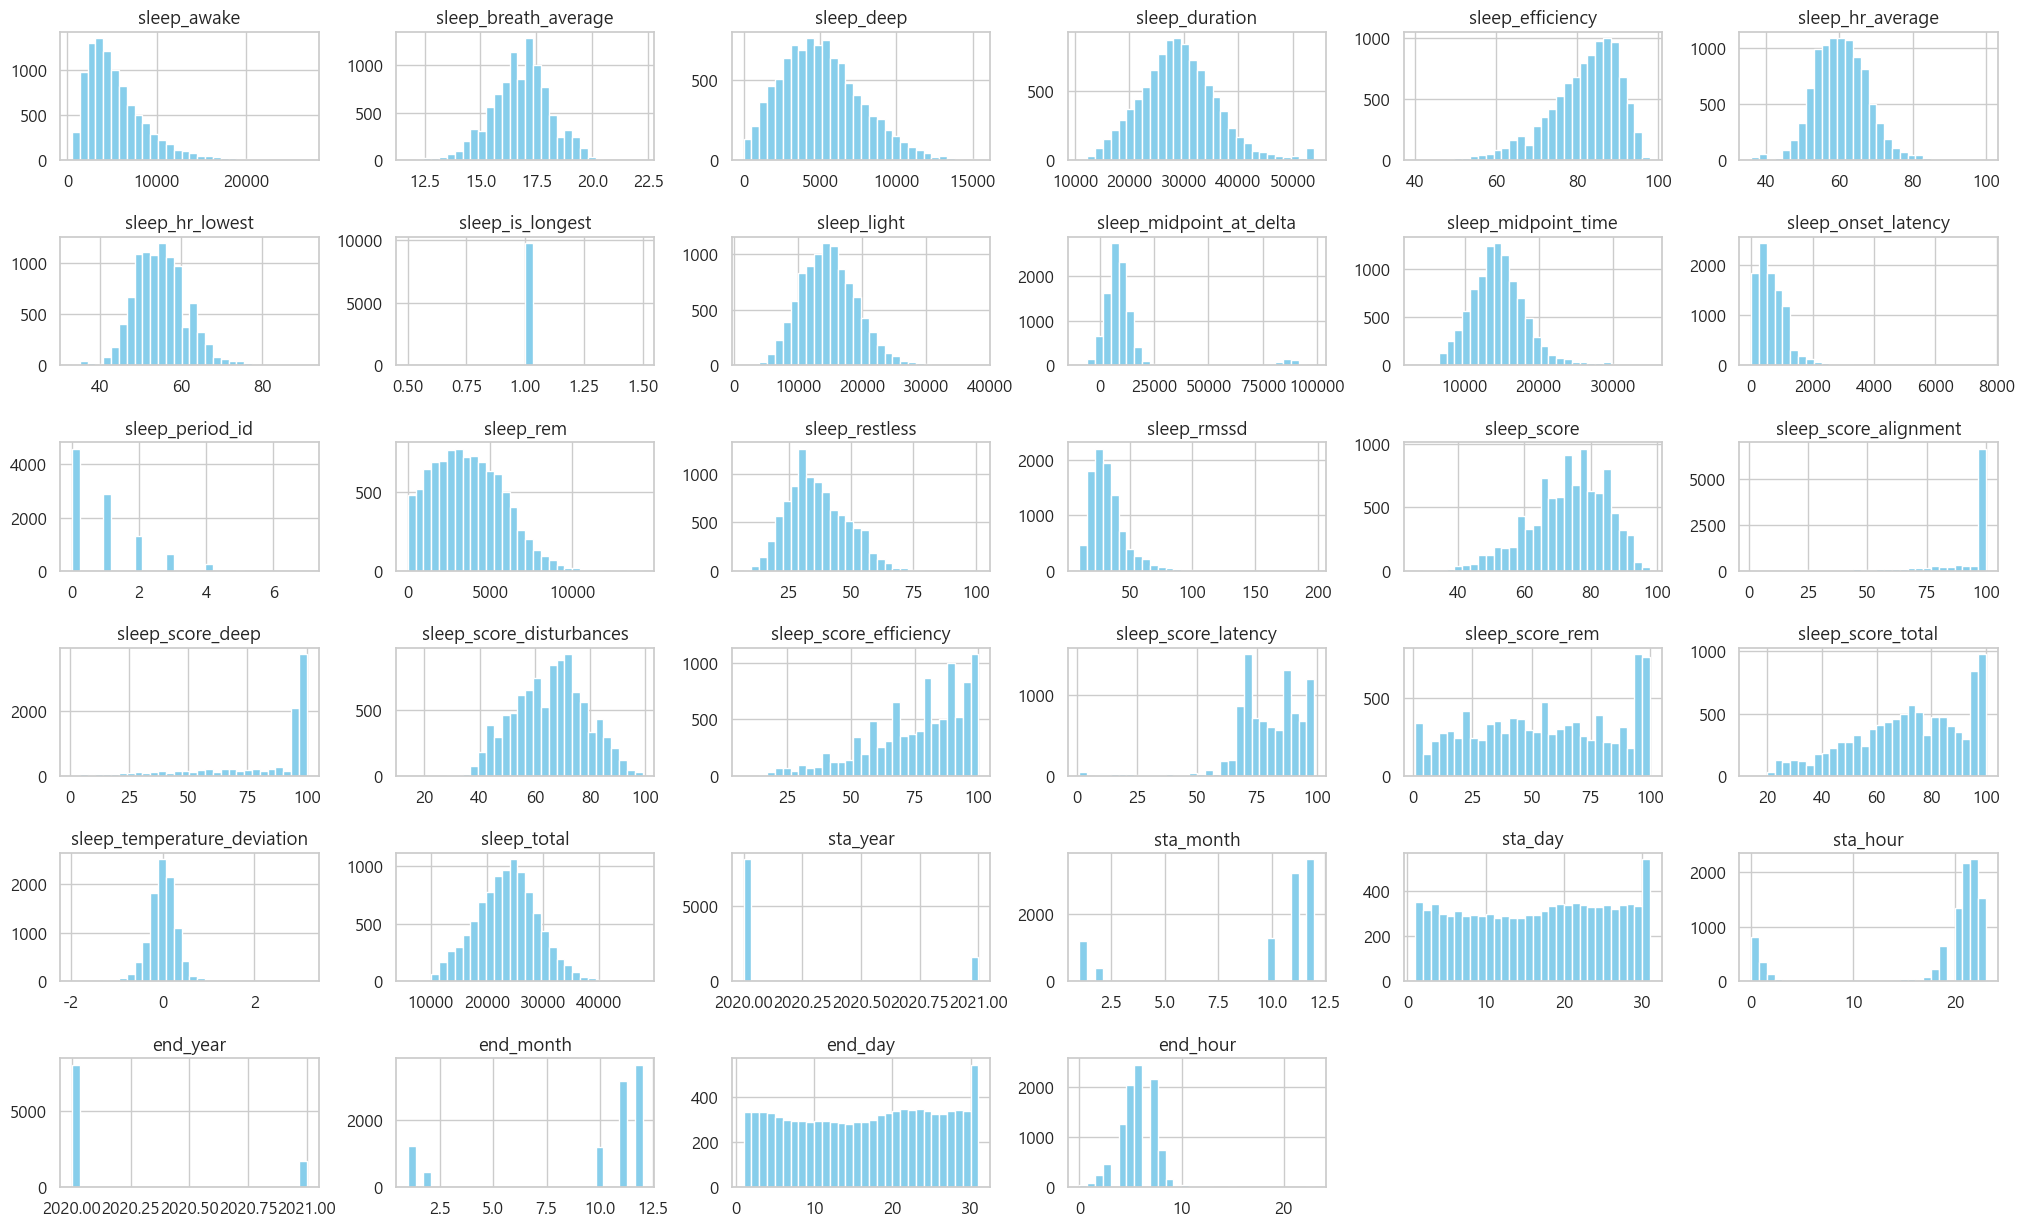

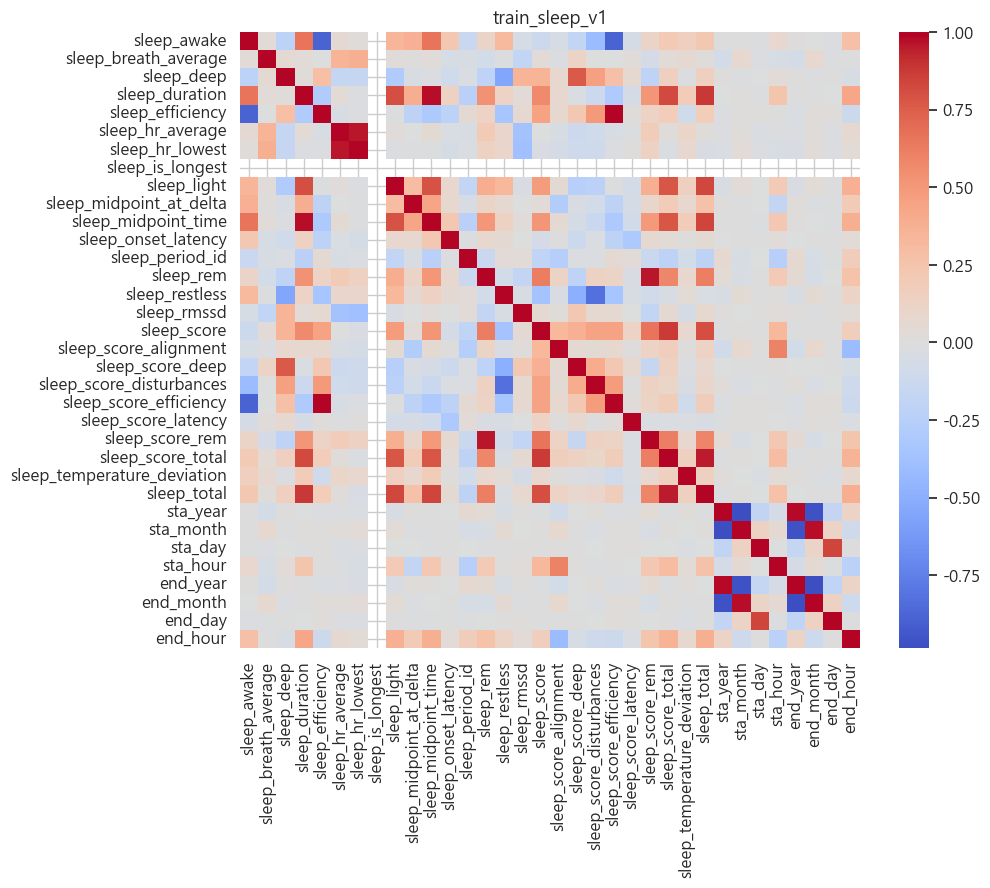

In [53]:
fst_eda(train_sleep_v1, "train_sleep_v1")

## mmse 데이터
*   문진 점수로 몇몇 항목은 train에서 모든 사람이 맞춘것으로 확인
*   친절도는 연관이 없음
*   1이 오답, 2가 정답
*   검진 횟수가 점수에 약간의 상관계수를 보임
*   추가적으로 경증의 경우 문진으로만 판단하기 어려움

train_mmse


,count,mean,std,min,25%,50%,75%,max
DIAG_SEQ,141.0,2.517730,1.239832,1.0,1.0,2.0,3.0,5.0
MMSE_NUM,141.0,2.496454,1.228379,1.0,1.0,2.0,3.0,5.0
MMSE_KIND,141.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
Q01,141.0,1.886525,0.318304,1.0,2.0,2.0,2.0,2.0
Q02,141.0,1.985816,0.118672,1.0,2.0,2.0,2.0,2.0
Q03,141.0,1.872340,0.334900,1.0,2.0,2.0,2.0,2.0
Q04,141.0,1.893617,0.309426,1.0,2.0,2.0,2.0,2.0
Q05,141.0,1.950355,0.217986,1.0,2.0,2.0,2.0,2.0
Q06,141.0,1.992908,0.084215,1.0,2.0,2.0,2.0,2.0
Q07,141.0,1.992908,0.084215,1.0,2.0,2.0,2.0,2.0


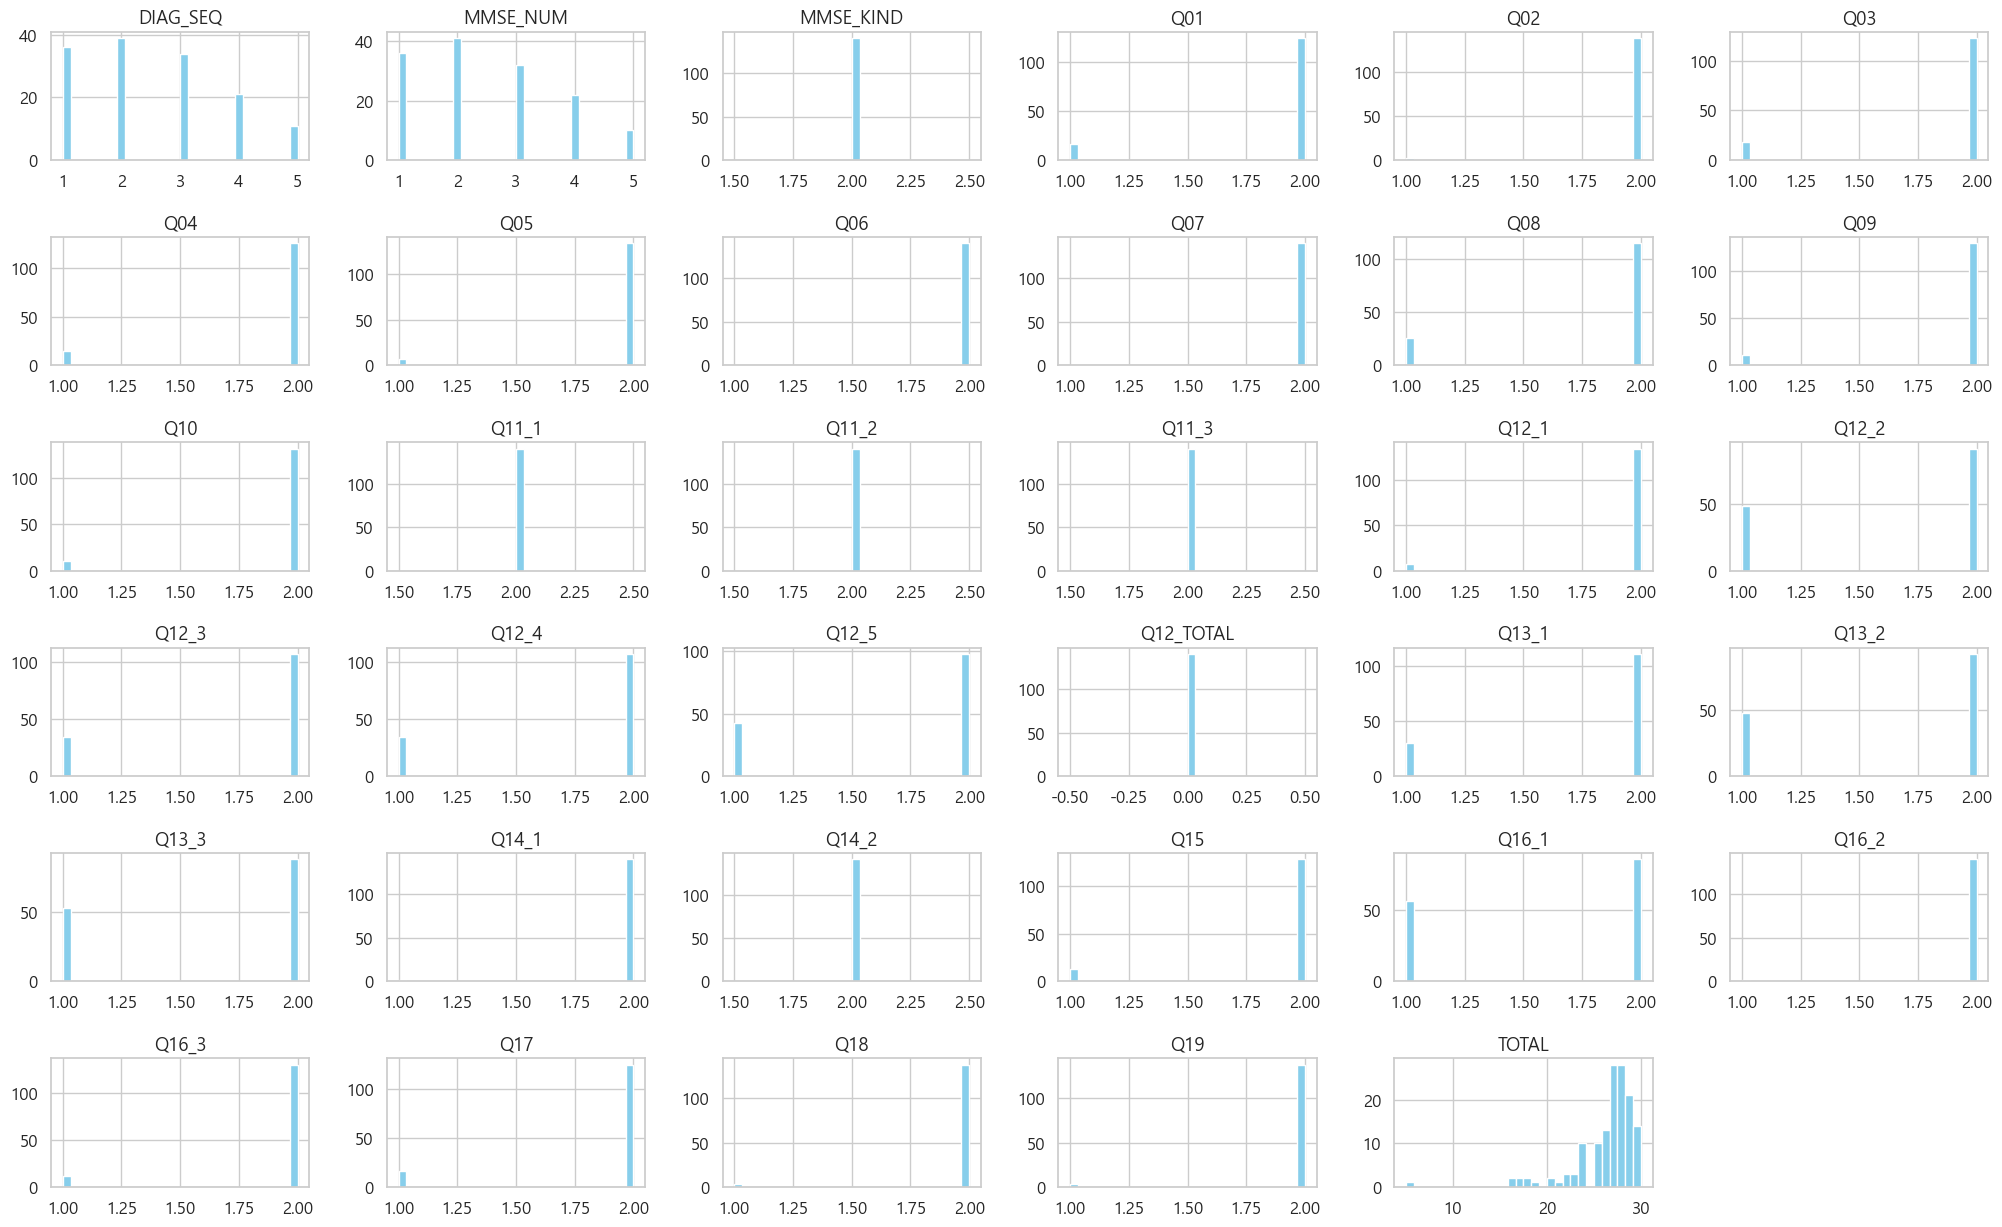

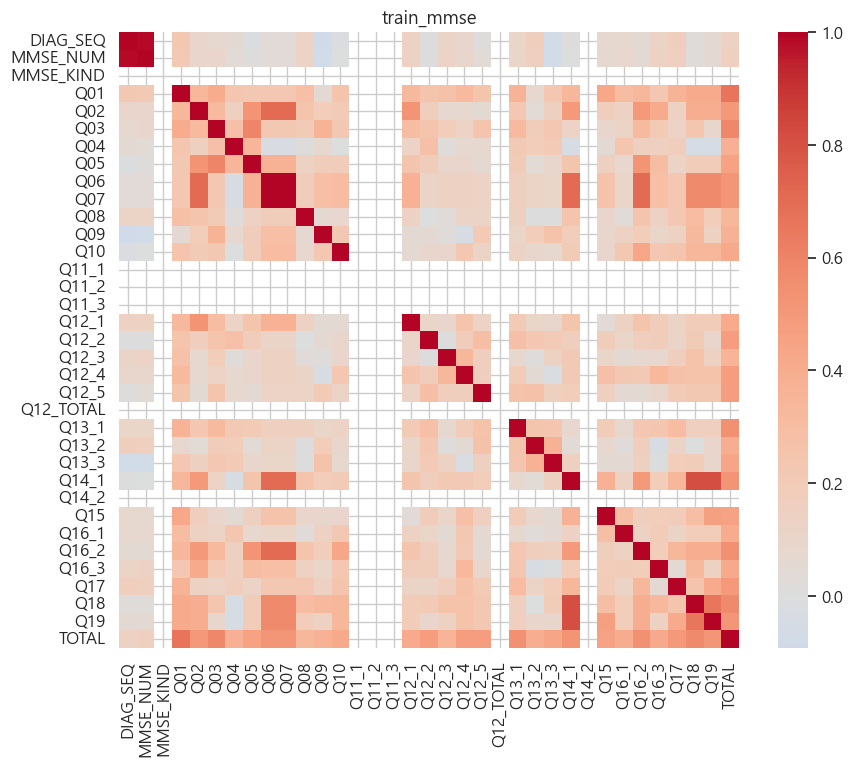

In [54]:
fst_eda(tr_mmse_df, "train_mmse")

In [55]:
tr_mmse_df

,SAMPLE_EMAIL,DIAG_SEQ,DIAG_NM,MMSE_NUM,MMSE_KIND,Q01,Q02,Q03,Q04,Q05,...,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL
0,nia+315@rowan.kr,2,CN,2,2,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,29
1,nia+014@rowan.kr,3,MCI,3,2,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,28
2,nia+220@rowan.kr,2,CN,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
3,nia+096@rowan.kr,2,MCI,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,27
4,nia+396@rowan.kr,3,CN,3,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,nia+181@rowan.kr,1,CN,1,2,2,2,2,1,2,...,2,2,2,2,2,1,2,2,2,26
137,nia+354@rowan.kr,2,CN,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,26
138,nia+448@rowan.kr,2,MCI,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,28
139,nia+394@rowan.kr,3,CN,3,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,28


## 이상치 데이터 확인
*   고강도 활동량이 149로 매우 높은 EMAIL을 확인
*   저, 중강도 포함 원래 활동량이 많은 사람이였음
*   검진을 받은 첫번째 날과 두번째 날에 고강도 운동량이 많았고, 그 후로는 저-중강도 위주로 활동을 한 것으로 확인

*   사람의 활동 데이터를 수집 한것이여서, 심리, 이벤트 등으로 값의 변화가 심할 수 있다는 것을 확인(ex. 신년 운동결심, 등산과 같은 운동 이벤트, 직장생활 중 야근 등)

In [56]:
act_df = train_activity_v1.copy()

In [57]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype                    
---  ------                             --------------  -----                    
 0   EMAIL                              9705 non-null   object                   
 1   activity_average_met               9705 non-null   float64                  
 2   activity_cal_active                9705 non-null   int64                    
 3   activity_cal_total                 9705 non-null   int64                    
 4   activity_daily_movement            9705 non-null   int64                    
 5   activity_day_end                   9705 non-null   datetime64[ns, UTC+09:00]
 6   activity_day_start                 9705 non-null   datetime64[ns, UTC+09:00]
 7   activity_high                      9705 non-null   int64                    
 8   activity_inactive                  9705 non-null   int64            

In [58]:
vecter_list = ['heart_vecter','met_vecter']

vec_df = act_df[vecter_list]

In [59]:
act_df[act_df['activity_high'] == 149]['EMAIL']

3003    nia+398@rowan.kr
Name: EMAIL, dtype: object

In [60]:
act_df[act_df['EMAIL'] == 'nia+398@rowan.kr'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 3003 to 3038
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype                    
---  ------                             --------------  -----                    
 0   EMAIL                              36 non-null     object                   
 1   activity_average_met               36 non-null     float64                  
 2   activity_cal_active                36 non-null     int64                    
 3   activity_cal_total                 36 non-null     int64                    
 4   activity_daily_movement            36 non-null     int64                    
 5   activity_day_end                   36 non-null     datetime64[ns, UTC+09:00]
 6   activity_day_start                 36 non-null     datetime64[ns, UTC+09:00]
 7   activity_high                      36 non-null     int64                    
 8   activity_inactive                  36 non-null     int64                

In [92]:
high_df = act_df[act_df['EMAIL'] == 'nia+398@rowan.kr']
high_df

,EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_day_end,activity_day_start,activity_high,activity_inactive,activity_inactivity_alerts,...,sta_year,sta_month,sta_day,sta_hour,end_year,end_month,end_day,end_hour,heart_vecter,met_vecter
3003,nia+398@rowan.kr,2.59375,2399,4554,44234,2020-11-28 03:59:59+09:00,2020-11-27 04:00:00+09:00,149,135,0,...,2020,11,27,4,2020,11,28,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.1, 0.9, 0.9, 0.9, 0.9, 1.1, 1.0, 1.2, 0.9, ..."
3004,nia+398@rowan.kr,2.75000,2640,4808,46659,2020-11-29 03:59:59+09:00,2020-11-28 04:00:00+09:00,137,207,0,...,2020,11,28,4,2020,11,29,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.1, ..."
3005,nia+398@rowan.kr,2.68750,2411,4680,45073,2020-12-02 03:59:59+09:00,2020-12-01 04:00:00+09:00,47,252,0,...,2020,12,1,4,2020,12,2,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.1, 0.9, 0.9, 0.9, 1.1, 1.0, 1.1, 0.9, 0.9, ..."
3006,nia+398@rowan.kr,1.65625,696,2862,12735,2020-12-03 03:59:59+09:00,2020-12-02 04:00:00+09:00,1,381,0,...,2020,12,2,4,2020,12,3,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.2, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."
3007,nia+398@rowan.kr,1.84375,1118,3248,22476,2020-12-04 03:59:59+09:00,2020-12-03 04:00:00+09:00,1,173,0,...,2020,12,3,4,2020,12,4,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.9, 0.9, 1.2, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."
3008,nia+398@rowan.kr,1.56250,707,2781,13523,2020-12-05 03:59:59+09:00,2020-12-04 04:00:00+09:00,10,304,0,...,2020,12,4,4,2020,12,5,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, ...","[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."
3009,nia+398@rowan.kr,1.78125,960,3088,18596,2020-12-06 03:59:59+09:00,2020-12-05 04:00:00+09:00,8,362,0,...,2020,12,5,4,2020,12,6,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.1, 0.9, 0.9, 0.9, 1.1, 0.9, 0.9, 0.9, 0.9, ..."
3010,nia+398@rowan.kr,1.81250,1086,3184,21283,2020-12-07 03:59:59+09:00,2020-12-06 04:00:00+09:00,8,223,1,...,2020,12,6,4,2020,12,7,3,"[1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, ...","[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."
3011,nia+398@rowan.kr,2.28125,1766,3961,33642,2020-12-08 03:59:59+09:00,2020-12-07 04:00:00+09:00,34,306,0,...,2020,12,7,4,2020,12,8,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.1, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9, 0.9, 0.9, ..."
3012,nia+398@rowan.kr,1.81250,1008,3171,20091,2020-12-09 03:59:59+09:00,2020-12-08 04:00:00+09:00,1,293,0,...,2020,12,8,4,2020,12,9,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."


### 필요없는 컬럼을 제거

In [62]:
obj_col = ['EMAIL','activity_day_end','activity_day_start']
not_select_col = obj_col + list(act_df.columns[27:])
select_col = act_df.columns.drop(not_select_col)
select_col_act_df = act_df[select_col]
print(len(select_col_act_df.columns))
select_col_act_df.columns

24


Index(['activity_average_met', 'activity_cal_active', 'activity_cal_total',
       'activity_daily_movement', 'activity_high', 'activity_inactive',
       'activity_inactivity_alerts', 'activity_low', 'activity_medium',
       'activity_met_min_high', 'activity_met_min_inactive',
       'activity_met_min_low', 'activity_met_min_medium', 'activity_non_wear',
       'activity_rest', 'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total'],
      dtype='object')

In [63]:
sleep_df = train_sleep_v1.copy()

In [65]:
obj_col = ['EMAIL','sleep_bedtime_end','sleep_bedtime_start']
not_select_col = obj_col + list(sleep_df.columns[29:])
select_col = sleep_df.columns.drop(not_select_col)
select_col_slp_df = sleep_df[select_col]
print(len(select_col_slp_df.columns))
select_col_slp_df.columns

26


Index(['sleep_awake', 'sleep_breath_average', 'sleep_deep', 'sleep_duration',
       'sleep_efficiency', 'sleep_hr_average', 'sleep_hr_lowest',
       'sleep_is_longest', 'sleep_light', 'sleep_midpoint_at_delta',
       'sleep_midpoint_time', 'sleep_onset_latency', 'sleep_period_id',
       'sleep_rem', 'sleep_restless', 'sleep_rmssd', 'sleep_score',
       'sleep_score_alignment', 'sleep_score_deep', 'sleep_score_disturbances',
       'sleep_score_efficiency', 'sleep_score_latency', 'sleep_score_rem',
       'sleep_score_total', 'sleep_temperature_deviation', 'sleep_total'],
      dtype='object')

In [70]:
lab_df = pd.read_csv(r"01.데이터\1.Training\라벨링데이터\1.걸음걸이\training_label.csv")

In [71]:
lab_df

,SAMPLE_EMAIL,DIAG_NM
0,nia+315@rowan.kr,CN
1,nia+014@rowan.kr,MCI
2,nia+220@rowan.kr,CN
3,nia+096@rowan.kr,MCI
4,nia+396@rowan.kr,CN
...,...,...
136,nia+181@rowan.kr,CN
137,nia+354@rowan.kr,CN
138,nia+448@rowan.kr,MCI
139,nia+394@rowan.kr,CN


## 통계값 비교
*   CN과 Dem의 통계값을 비교

In [72]:
all_df = pd.merge(act_df, sleep_df, left_index=True, right_index=True, how='left')
all_df.rename(columns={'EMAIL_x': 'EMAIL'},inplace=True)
all_df = pd.merge(all_df, lab_df, left_on='EMAIL', right_on='SAMPLE_EMAIL', how='left')
all_df = all_df.drop(['SAMPLE_EMAIL', 'EMAIL_y'], axis=1)

In [ ]:
# 진단별 EMAIL을 추출
cn_emails_all = all_df.loc[all_df['DIAG_NM']=='CN','EMAIL'].unique()
mci_emails_all = all_df.loc[all_df['DIAG_NM']=='MCI','EMAIL'].unique()
dem_emails_all = all_df.loc[all_df['DIAG_NM']=='Dem','EMAIL'].unique()

# 각각 desctibe을 구함
cn_desc = all_df[all_df['EMAIL'].isin(cn_emails_all)].describe()
mci_desc = all_df[all_df['EMAIL'].isin(mci_emails_all)].describe()
dem_desc = all_df[all_df['EMAIL'].isin(dem_emails_all)].describe()

# 합치기
grup_desc = pd.concat(
    [cn_desc, mci_desc, dem_desc],
    axis=1,
    keys=['CN', 'MCI', 'Dem']
).swaplevel(axis=1).sort_index(axis=1)

In [ ]:
grup_desc

activity_average_met                          activity_cal_active  \
                        CN         Dem          MCI                  CN   
count          5781.000000  571.000000  3353.000000         5781.000000   
mean              1.471274    1.383483     1.484892          466.329182   
std               0.189083    0.266650     0.183005          267.526797   
min               0.062500    0.812500     0.218750            0.000000   
25%               1.343750    1.218750     1.343750          265.000000   
50%               1.437500    1.343750     1.468750          423.000000   
75%               1.593750    1.468750     1.593750          609.000000   
max               4.031250    2.656250     2.343750         2640.000000   

                                activity_cal_total                            \
               Dem          MCI                 CN          Dem          MCI   
count   571.000000  3353.000000        5781.000000   571.000000  3353.000000   
mean    400.504378   483.042052        2490.928905  2425.490368  2544.159559   
std     372.823477   254.703797         369.078329   445.240744   311.759091   
min       3.000000     7.000000        1478.000000  1766.000000  1582.000000   
25%     149.000000   290.000000        2254.000000  2136.500000  2316.000000   
50%     351.000000   448.000000        2468.000000  2360.000000  2514.000000   
75%     487.000000   647.000000        2717.000000  2538.000000  2744.000000   
max    2292.000000  1815.000000        4808.000000  4585.000000  4046.000000   

      activity_daily_movement  ...  sta_month_x  sta_month_y              \
                           CN  ...          MCI           CN         Dem   
count             5781.000000  ...  3353.000000  5781.000000  571.000000   
mean              8840.553019  ...     9.889353     9.368448   10.290718   
std               5199.292542  ...     3.487959     4.051682    3.041739   
min                  0.000000  ...     1.000000     1.000000    1.000000   
25%               4907.000000  ...    10.000000    10.000000   10.000000   
50%               8108.000000  ...    11.000000    11.000000   11.000000   
75%              11699.000000  ...    12.000000    12.000000   12.000000   
max              46659.000000  ...    12.000000    12.000000   12.000000   

                     sta_year_x                             sta_year_y  \
               MCI           CN          Dem          MCI           CN   
count  3353.000000  5781.000000   571.000000  3353.000000  5781.000000   
mean      9.917686  2020.202041  2020.101576  2020.134506  2020.195987   
std       3.431797     0.401558     0.302355     0.341246     0.396993   
min       1.000000  2020.000000  2020.000000  2020.000000  2020.000000   
25%      10.000000  2020.000000  2020.000000  2020.000000  2020.000000   
50%      11.000000  2020.000000  2020.000000  2020.000000  2020.000000   
75%      12.000000  2020.000000  2020.000000  2020.000000  2020.000000   
max      12.000000  2021.000000  2021.000000  2021.000000  2021.000000   

                                 
               Dem          MCI  
count   571.000000  3353.000000  
mean   2020.094571  2020.129735  
std       0.292878     0.336061  
min    2020.000000  2020.000000  
25%    2020.000000  2020.000000  
50%    2020.000000  2020.000000  
75%    2020.000000  2020.000000  
max    2021.000000  2021.000000  

[8 rows x 198 columns]

### 차이가 큰 CN과 Dem만 차이 비교

In [73]:
cn_emails_all = all_df.loc[all_df['DIAG_NM']=='CN','EMAIL'].unique()
dem_emails_all = all_df.loc[all_df['DIAG_NM']=='Dem','EMAIL'].unique()

cn_desc = all_df[all_df['EMAIL'].isin(cn_emails_all)].describe()
dem_desc = all_df[all_df['EMAIL'].isin(dem_emails_all)].describe()

compare = pd.concat(
    [cn_desc, dem_desc],
    axis=1,
    keys=['CN', 'Dem']
).swaplevel(axis=1).sort_index(axis=1)

In [75]:
diff_df = cn_desc - dem_desc
diff_df

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,...,sleep_temperature_deviation,sleep_total,sta_year_y,sta_month_y,sta_day_y,sta_hour_y,end_year_y,end_month_y,end_day_y,end_hour_y
count,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,...,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000
mean,0.087792,65.824804,65.438537,1376.512738,0.287989,44.481070,0.127814,68.648944,6.762184,0.851306,...,0.026402,-3695.539222,0.101416,-0.922270,0.021880,0.398538,0.100465,-0.911743,0.043303,-0.812599
std,-0.077567,-105.296680,-76.162416,-2255.788048,0.844076,4.847922,0.142377,-8.556079,-9.677257,7.855912,...,-0.030879,-1315.168554,0.104115,1.009943,-0.171174,0.453696,0.099202,0.965055,-0.151686,-0.236662
min,-0.750000,-3.000000,-288.000000,-12.000000,0.000000,-18.000000,0.000000,-5.000000,0.000000,0.000000,...,-0.130000,-5190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,116.000000,117.500000,2574.000000,0.000000,35.000000,0.000000,79.000000,14.000000,0.000000,...,0.030000,-1980.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.093750,72.000000,108.000000,1706.000000,1.000000,39.000000,0.000000,90.000000,6.000000,7.000000,...,0.020000,-4200.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.125000,122.000000,179.000000,2656.500000,1.000000,49.000000,0.000000,61.000000,13.500000,1.500000,...,0.020000,-5445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.375000,348.000000,223.000000,1165.000000,78.000000,0.000000,1.000000,144.000000,-24.000000,564.000000,...,0.630000,3960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000


In [76]:
pct_diff = (cn_desc / dem_desc.replace(0, np.nan)) * 100
pct_diff

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,...,sleep_temperature_deviation,sleep_total,sta_year_y,sta_month_y,sta_day_y,sta_hour_y,end_year_y,end_month_y,end_day_y,end_hour_y
count,1012.434326,1012.434326,1012.434326,1012.434326,1012.434326,1012.434326,1012.434326,1012.434326,1012.434326,1012.434326,...,1012.434326,1012.434326,1012.434326,1012.434326,1012.434326,1012.434326,1012.434326,1012.434326,1012.434326,1012.434326
mean,106.345688,116.435477,102.697951,118.441925,109.684440,109.282978,133.477907,132.111795,114.647423,103.858208,...,31.568430,86.361993,100.005020,91.037849,100.137048,102.272700,100.004973,91.093152,100.272405,87.767099
std,70.910732,71.756961,82.894105,69.741601,113.311435,103.645869,121.049839,93.278768,81.433778,116.920002,...,91.076541,80.306675,135.548882,133.202804,98.128217,106.233845,132.809930,130.780508,98.340471,88.312407
min,7.692308,0.000000,83.691959,0.000000,NaN,35.714286,NaN,0.000000,NaN,NaN,...,107.027027,53.243243,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,NaN
25%,110.256410,177.852349,105.499649,210.330047,NaN,108.838384,NaN,168.103448,380.000000,NaN,...,86.363636,90.934066,100.000000,100.000000,100.000000,105.555556,100.000000,100.000000,100.000000,83.333333
50%,106.976744,120.512821,104.576271,126.647923,NaN,108.141962,NaN,149.180328,115.789474,NaN,...,-0.000000,84.864865,100.000000,100.000000,94.117647,105.000000,100.000000,100.000000,100.000000,100.000000
75%,108.510638,125.051335,107.052797,129.377938,133.333333,108.750000,100.000000,120.748299,121.259843,106.122449,...,113.333333,83.139805,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
max,151.764706,115.183246,104.863686,102.560777,209.859155,100.000000,120.000000,120.083682,93.370166,207.224335,...,132.142857,109.034908,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,121.052632


In [77]:
pct_diff.iloc[1,:20]

activity_average_met                 106.345688
activity_cal_active                  116.435477
activity_cal_total                   102.697951
activity_daily_movement              118.441925
activity_high                        109.684440
activity_inactive                    109.282978
activity_inactivity_alerts           133.477907
activity_low                         132.111795
activity_medium                      114.647423
activity_met_min_high                103.858208
activity_met_min_inactive            120.420828
activity_met_min_low                 128.892022
activity_met_min_medium              111.068804
activity_non_wear                    113.613246
activity_rest                         81.082262
activity_score                       110.726548
activity_score_meet_daily_targets    162.663718
activity_score_move_every_hour        98.340591
activity_score_recovery_time          94.473041
activity_score_stay_active            94.523840
Name: mean, dtype: float64

In [78]:
pers = pct_diff.iloc[1]
per_diff_30_list = []
for inx, val in pers.items():
    if val >= 130 or val <= 70:
        per_diff_30_list.append((inx, val))

In [79]:
per_diff_30_list

[('activity_inactivity_alerts', 133.47790690477666),
 ('activity_low', 132.111794797379),
 ('activity_score_meet_daily_targets', 162.66371803156576),
 ('sleep_midpoint_at_delta', 65.48759324682621),
 ('sleep_temperature_deviation', 31.56843018000881)]

## 시각화


### 수면의 변동성이 CN과 Dem의 차이 시각화
*   또한 많으면 보기가 힘들기 때문에 5명 샘플링하여 시각화

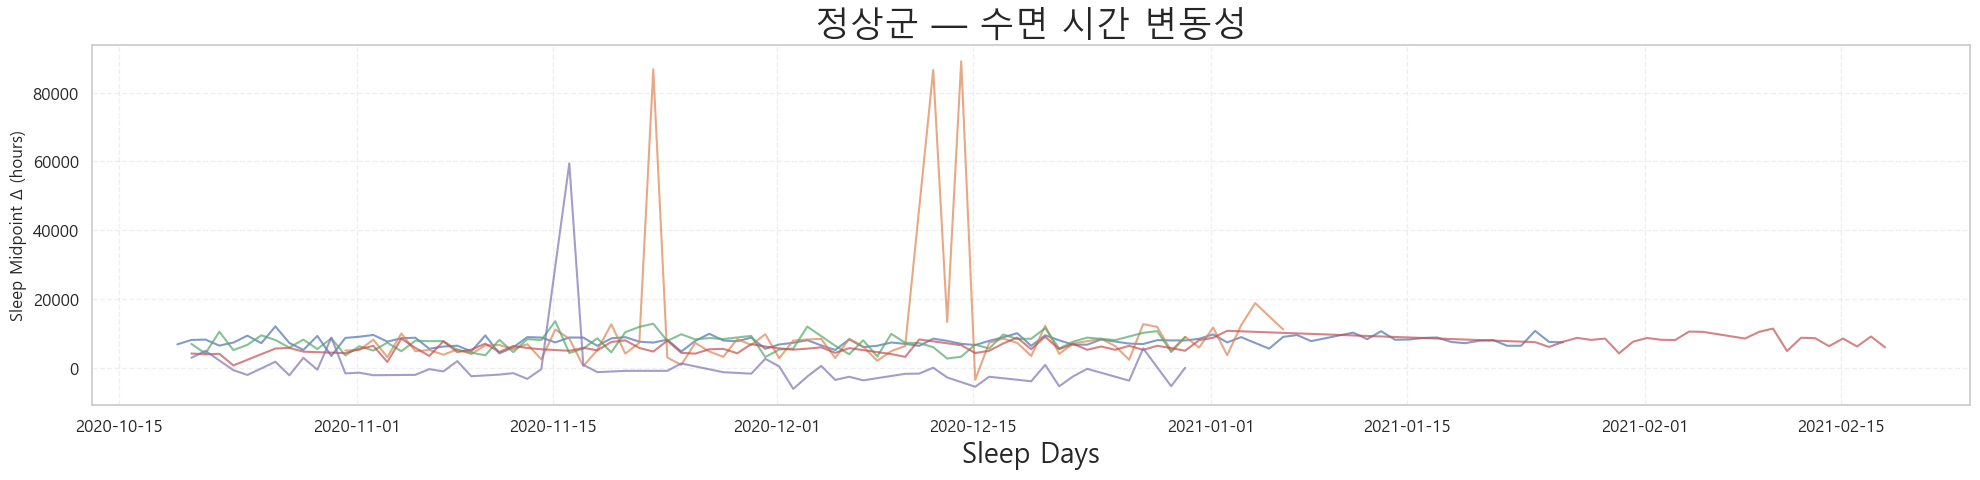

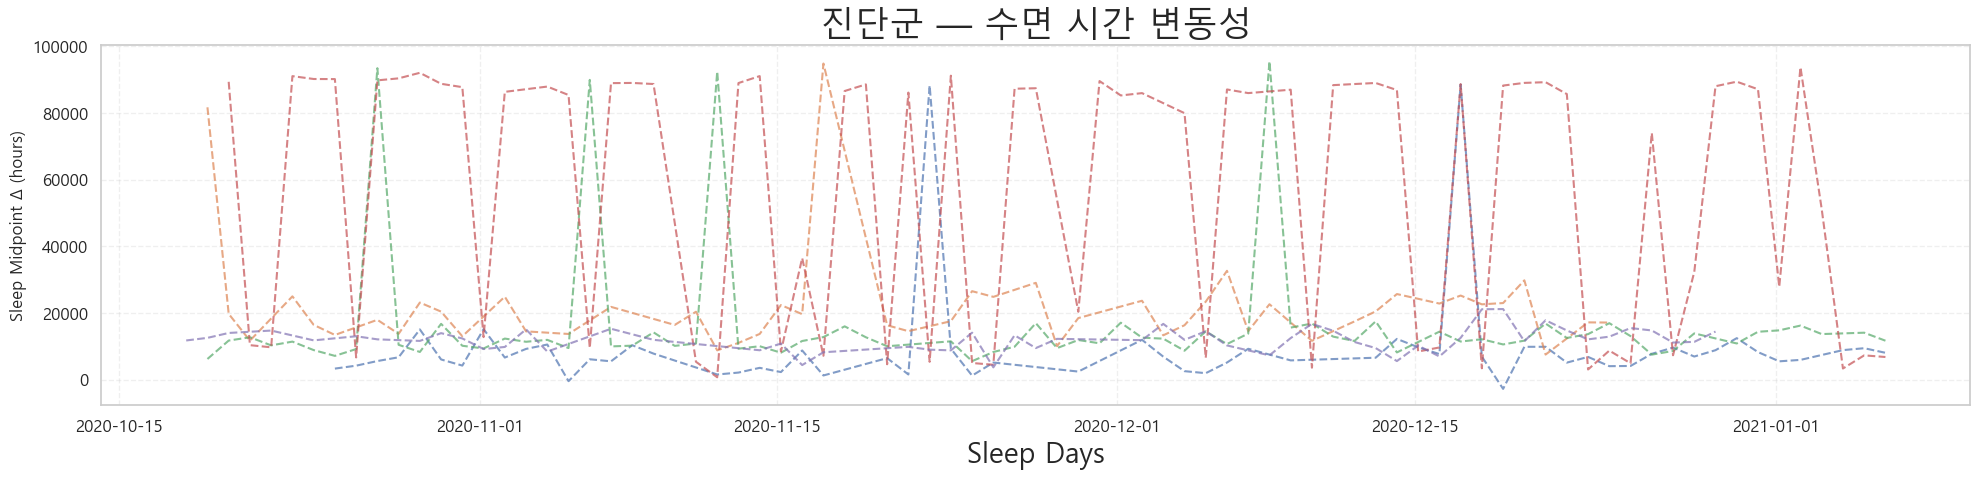

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import random

random.seed(12)

# 1️⃣ CN과 Dem 각각 5명씩 샘플 추출
cn_emails = all_df.loc[all_df['DIAG_NM'] == 'CN', 'EMAIL'].unique()
dem_emails = all_df.loc[all_df['DIAG_NM'] == 'Dem', 'EMAIL'].unique()

sample_cn = random.sample(list(cn_emails), 5)
sample_dem = random.sample(list(dem_emails), 5)

# 2️⃣ 날짜를 datetime으로 변환
all_df['activity_day_end'] = pd.to_datetime(all_df['activity_day_end'])

# -----------------------------
# 3️⃣ CN (정상군) 그래프
# -----------------------------
plt.figure(figsize=(20, 5))
for email in sample_cn:
    sub = all_df[all_df['EMAIL'] == email].sort_values('activity_day_end')
    plt.plot(sub['activity_day_end'], sub['sleep_midpoint_at_delta'], label=f'CN_{email}', alpha=0.7)

plt.title('정상군 — 수면 시간 변동성', fontsize=25)
plt.xlabel('Sleep Days', fontsize=20)
plt.ylabel('Sleep Midpoint Δ (hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------
# 4️⃣ Dem (치매군) 그래프
# -----------------------------
plt.figure(figsize=(20, 5))
for email in sample_dem:
    sub = all_df[all_df['EMAIL'] == email].sort_values('activity_day_end')
    plt.plot(sub['activity_day_end'], sub['sleep_midpoint_at_delta'], label=f'Dem_{email}', alpha=0.7, linestyle='--')

plt.title('진단군 — 수면 시간 변동성', fontsize=25)
plt.xlabel('Sleep Days', fontsize=20)
plt.ylabel('Sleep Midpoint Δ (hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

activity_rest: 휴식시간
sleep_hr_lowest: 분당 낮은 심박동 수

### CN과 Dem의 서로의 상관관계를 확인하는 히트맵

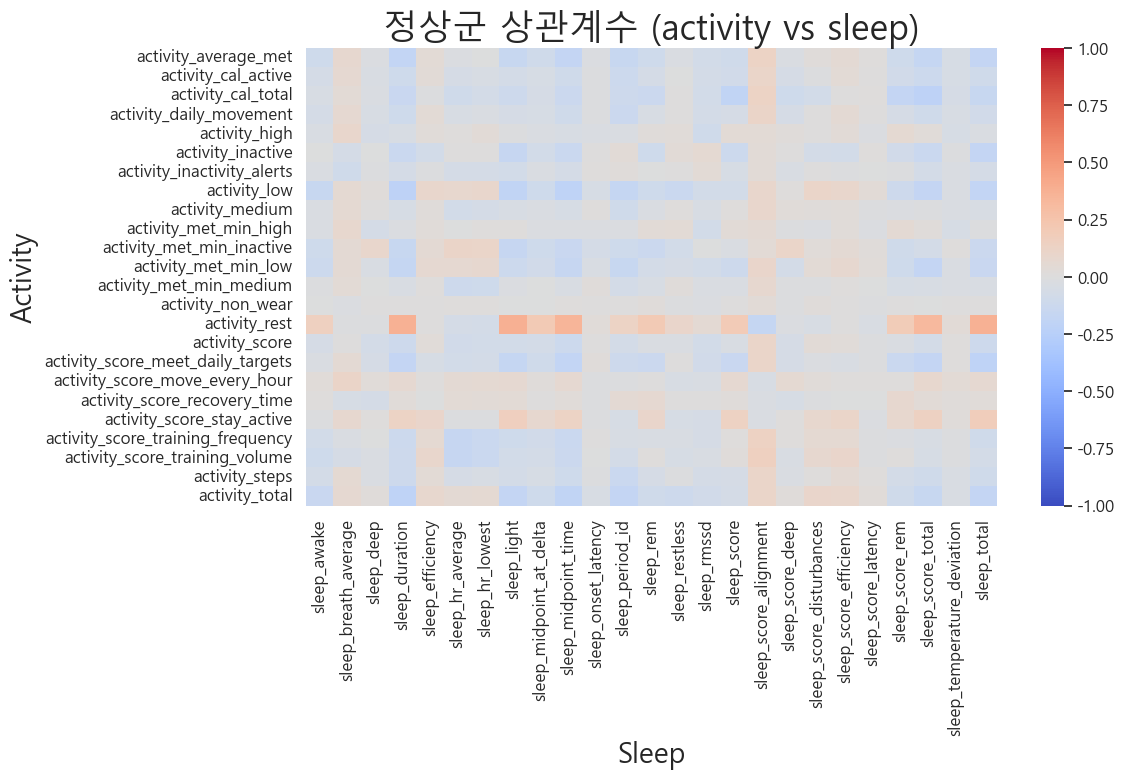

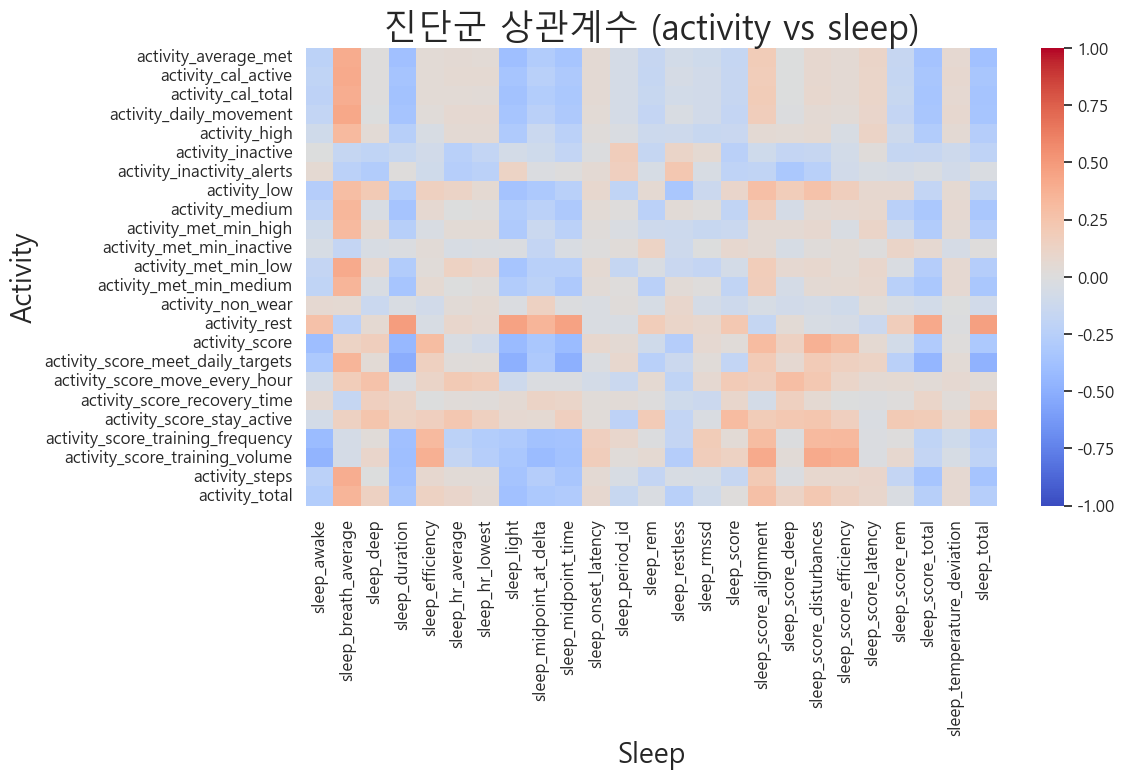

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CN / Dem 그룹 분리
cn_emails_all = all_df.loc[all_df['DIAG_NM']=='CN', 'EMAIL'].unique()
dem_emails_all = all_df.loc[all_df['DIAG_NM']=='Dem', 'EMAIL'].unique()

# 숫자형 컬럼 중 _x, _y로 끝나는 컬럼 제외
df = all_df.drop('sleep_is_longest', axis=1)
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols = [col for col in num_cols if not (col.endswith('_x') or col.endswith('_y'))]


# 상관계수 계산
cn_corr = df[df['EMAIL'].isin(cn_emails_all)][num_cols].corr()
dem_corr = df[df['EMAIL'].isin(dem_emails_all)][num_cols].corr()


front_cols = num_cols[:24]
back_cols = num_cols[-25:]

# 교차 상관 부분행렬 추출 (Y: activity, X: sleep)
cn_cross_corr = cn_corr.loc[front_cols, back_cols]
dem_cross_corr = dem_corr.loc[front_cols, back_cols]


# CN 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(cn_cross_corr, cmap='coolwarm', vmin=-1, vmax=1, center=0, annot=False)
plt.title('정상군 상관계수 (activity vs sleep)', fontsize=25)
plt.xlabel('Sleep', fontsize=20)
plt.ylabel('Activity', fontsize=20)
plt.tight_layout()
plt.show()

# DEM 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(dem_cross_corr, cmap='coolwarm',vmin=-1, vmax=1, center=0, annot=False)
plt.title('진단군 상관계수 (activity vs sleep)', fontsize=25)
plt.xlabel('Sleep', fontsize=20)
plt.ylabel('Activity', fontsize=20)
plt.tight_layout()
plt.show()

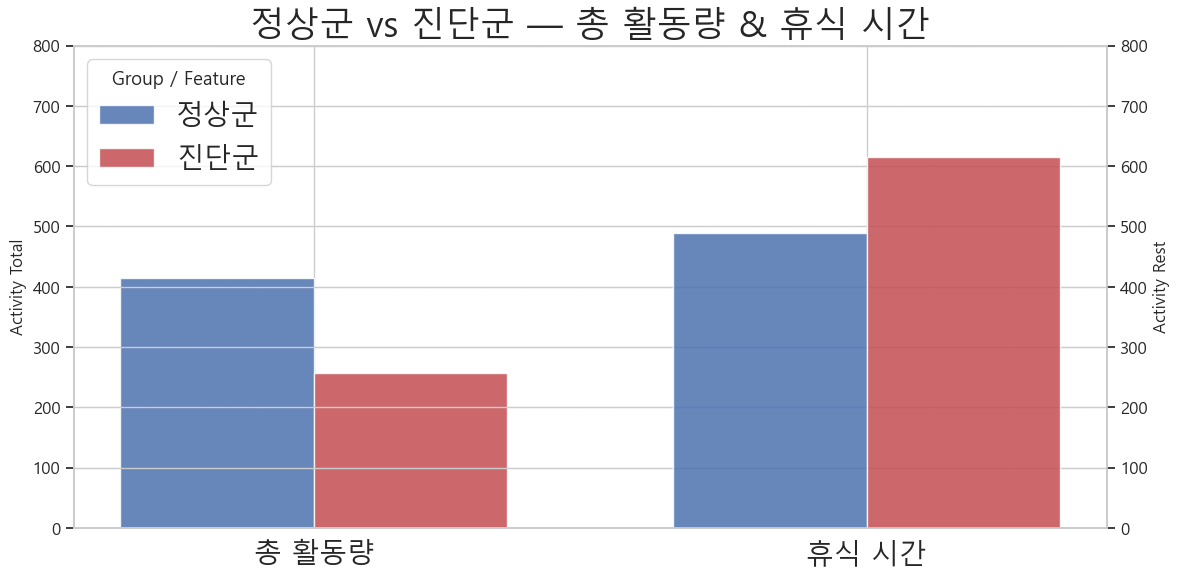

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# 1️⃣ CN/Dem 각각 5명 샘플
cn_emails_all = all_df.loc[all_df['DIAG_NM']=='CN','EMAIL'].unique()
dem_emails_all = all_df.loc[all_df['DIAG_NM']=='Dem','EMAIL'].unique()

random.seed(123)

k_cn = min(5, len(cn_emails_all))
k_dem = min(5, len(dem_emails_all))
sample_cn = random.sample(list(cn_emails_all), k_cn)
sample_dem = random.sample(list(dem_emails_all), k_dem)

# 2️⃣ 각 그룹 평균 계산
cols = [ 'activity_total', 'activity_rest']
cn_mean = all_df[all_df['EMAIL'].isin(sample_cn)][cols].mean()
dem_mean = all_df[all_df['EMAIL'].isin(sample_dem)][cols].mean()

# 3️⃣ X축(피처)와 값 준비
features = [ 'activity_total', 'activity_rest']
x = range(len(features))
width = 0.35

cn_vals = [cn_mean['activity_total'], cn_mean['activity_rest']]
dem_vals = [ dem_mean['activity_total'], dem_mean['activity_rest']]

# 4️⃣ 그래프 설정 (왼쪽 1개, 오른쪽 1개)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()  # 오른쪽 Y축

# -------------------------------
# 왼쪽 Y축: sleep_score_deep (x=0 위치)
b1 = ax1.bar(0 - width/2, cn_vals[0], width=width, color='#4C72B0', alpha=0.85, label='CN - Sleep')
b2 = ax1.bar(0 + width/2, dem_vals[0], width=width, color='#C44E52', alpha=0.85, label='Dem - Sleep')

# 오른쪽 Y축: activity_total & activity_rest (x=1, 2 위치)
b3 = ax2.bar(1 - width/2, cn_vals[1], width=width, color='#4C72B0', alpha=0.85, label='CN - Activity Total')
b4 = ax2.bar(1 + width/2, dem_vals[1], width=width, color='#C44E52', alpha=0.85, label='Dem - Activity Total')

# -------------------------------
# 축/라벨 설정
ax1.set_xticks(list(x))
ax1.set_xticklabels(['총 활동량','휴식 시간'], fontsize=20)

ax1.set_ylabel('Activity Total', fontsize=12)
ax2.set_ylabel('Activity Rest', fontsize=12)

# 요구 스케일 반영
ax1.set_ylim(0, 800)  # sleep: 30~90
ax2.set_ylim(0, 800)   # activity_total/rest: 0~600

ax1.tick_params(axis='y')
ax2.tick_params(axis='y')

# -------------------------------
# 범례 병합
plt.legend(['정상군', '진단군'], title='Group / Feature', loc='upper left', fontsize=20)

ax1.grid(axis='y', linestyle='--', alpha=0.3)
plt.title('정상군 vs 진단군 — 총 활동량 & 휴식 시간', fontsize=25)
plt.tight_layout()
plt.show()

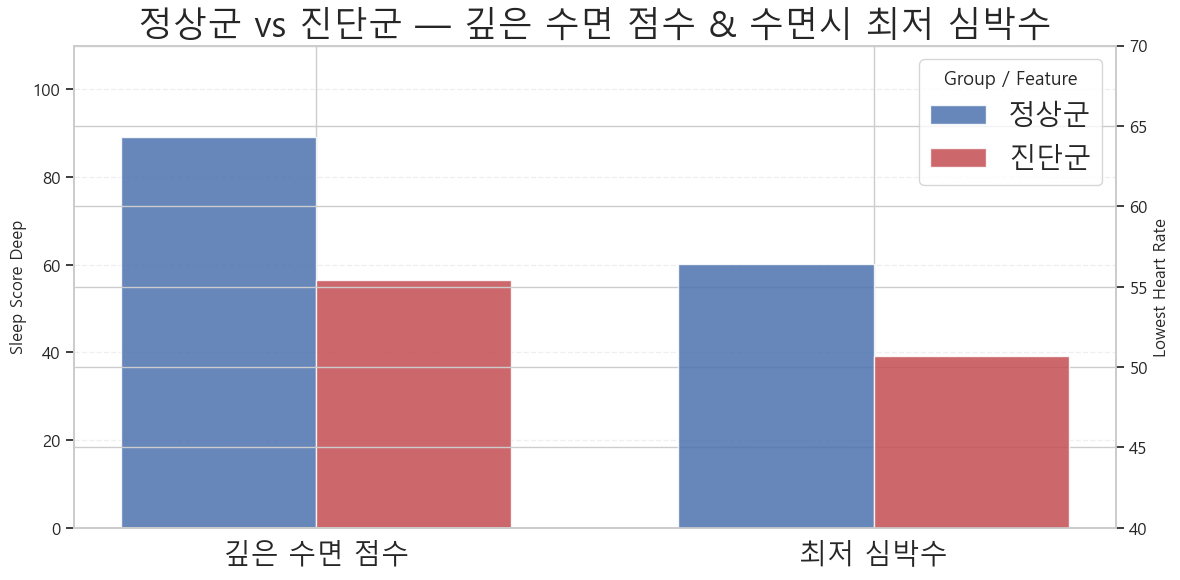

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# 1️⃣ CN/Dem 각각 5명 샘플
cn_emails_all = all_df.loc[all_df['DIAG_NM']=='CN','EMAIL'].unique()
dem_emails_all = all_df.loc[all_df['DIAG_NM']=='Dem','EMAIL'].unique()

random.seed(123)

k_cn = min(5, len(cn_emails_all))
k_dem = min(5, len(dem_emails_all))
sample_cn = random.sample(list(cn_emails_all), k_cn)
sample_dem = random.sample(list(dem_emails_all), k_dem)

# 2️⃣ 각 그룹 평균 계산
cols = ['sleep_score_deep', 'activity_total', 'sleep_hr_lowest']
cn_mean = all_df[all_df['EMAIL'].isin(sample_cn)][cols].mean()
dem_mean = all_df[all_df['EMAIL'].isin(sample_dem)][cols].mean()

# 3️⃣ X축(피처)와 값 준비
features = ['sleep_score_deep', 'sleep_hr_lowest']
x = range(len(features))
width = 0.35

cn_vals = [cn_mean['sleep_score_deep'], cn_mean['sleep_hr_lowest']]
dem_vals = [dem_mean['sleep_score_deep'], dem_mean['sleep_hr_lowest']]

# 4️⃣ 그래프 설정 (왼쪽 1개, 오른쪽 1개)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()  # 오른쪽 Y축

# -------------------------------
# 왼쪽 Y축: sleep_score_deep (x=0 위치)
b1 = ax1.bar(0 - width/2, cn_vals[0], width=width, color='#4C72B0', alpha=0.85, label='CN - Sleep')
b2 = ax1.bar(0 + width/2, dem_vals[0], width=width, color='#C44E52', alpha=0.85, label='Dem - Sleep')

# 오른쪽 Y축: activity_total & activity_rest (x=1, 2 위치)
b3 = ax2.bar(1 - width/2, cn_vals[1], width=width, color='#4C72B0', alpha=0.85, label='CN - Activity Total')
b4 = ax2.bar(1 + width/2, dem_vals[1], width=width, color='#C44E52', alpha=0.85, label='Dem - Activity Total')

# -------------------------------
# 축/라벨 설정
ax1.set_xticks(list(x))
ax1.set_xticklabels(['깊은 수면 점수', '최저 심박수'], fontsize=20)

ax1.set_ylabel('Sleep Score Deep', fontsize=12)
ax2.set_ylabel('Lowest Heart Rate', fontsize=12)

# 요구 스케일 반영
ax1.set_ylim(0, 110)   # sleep: 30~90
ax2.set_ylim(40, 70)

ax1.tick_params(axis='y')
ax2.tick_params(axis='y')

# -------------------------------
# 범례 병합
plt.legend(['정상군', '진단군'], title='Group / Feature', loc='upper right', fontsize=20)

ax1.grid(axis='y', linestyle='--', alpha=0.3)
plt.title('정상군 vs 진단군 — 깊은 수면 점수 & 수면시 최저 심박수', fontsize=25)
plt.tight_layout()
plt.show()

##### 사용 안하는 시각화 함수

In [ ]:
# 시각화의 함수화, 필요 요소가 바뀌어서 사용 안함
def view_bar(df, cols, y1lim=110, y2lim=110, nums=5 ,seed=123):
    # 각 타겟군의 EMAIL 추출
    random.seed(seed)
    cn_emails_all = df.loc[df['DIAG_NM']=='CN','EMAIL'].unique()
    dem_emails_all = df.loc[df['DIAG_NM']=='Dem','EMAIL'].unique()

    # 랜덤 샘플링
    k_cn = min(nums, len(cn_emails_all))
    k_dem = min(nums, len(dem_emails_all))
    sample_cn = random.sample(list(cn_emails_all), k_cn)
    sample_dem = random.sample(list(dem_emails_all), k_dem)

    # 각 컬럼 평균
    cn_mean = all_df[all_df['EMAIL'].isin(sample_cn)][cols].mean()
    dem_mean = all_df[all_df['EMAIL'].isin(sample_dem)][cols].mean()

    x = range(len(cols))
    width = 0.35
    col1, col2 = cols

    cn_vals = [cn_mean[col1], cn_mean[col2]]
    dem_vals = [dem_mean[col1], dem_mean[col2]]

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx() 

    #2중 바 그래프
    b1 = ax1.bar(0 - width/2, cn_vals[0], width=width, color='#4C72B0', alpha=0.85, label=f'CN - {col1}')
    b2 = ax1.bar(0 + width/2, dem_vals[0], width=width, color='#C44E52', alpha=0.85, label=f'Dem - {col1}')

    b3 = ax2.bar(1 - width/2, cn_vals[1], width=width, color='#4C72B0', alpha=0.85, label=f'CN - {col2}')
    b4 = ax2.bar(1 + width/2, dem_vals[1], width=width, color='#C44E52', alpha=0.85, label=f'Dem - {col2}')


    ax1.set_xticks(list(x))
    ax1.set_xticklabels(cols, fontsize=11)

    ax1.set_ylabel(f'{col1}', color='#4C72B0', fontsize=12)
    ax2.set_ylabel(f'{col2}', color='#DD8452', fontsize=12)


    ax1.set_ylim(0, y1lim)   
    ax2.set_ylim(0, y2lim)   

    ax1.tick_params(axis='y', labelcolor='#4C72B0')
    ax2.tick_params(axis='y', labelcolor='#DD8452')

    plt.legend(['CN', 'Dem'], title='Group / Feature', loc='upper left')

    ax1.grid(axis='y', linestyle='--', alpha=0.3)
    plt.title(f'CN vs Dem — {col1} & {col2}', fontsize=14)
    plt.tight_layout()
    plt.show()

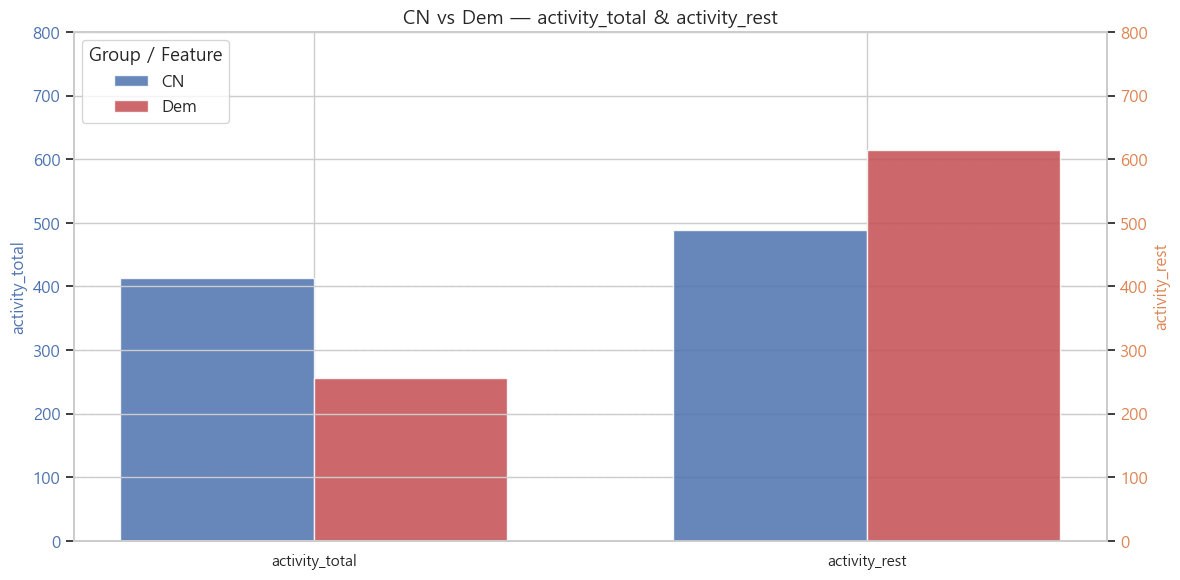

In [87]:
cols = ['activity_total', 'activity_rest']
view_bar(all_df, cols, y1lim=800, y2lim=800)

In [88]:
def view_bar2(df, cols=None, y_lim=None, nums=None ,seed=123):
    # 각 타겟군의 EMAIL 추출
    random.seed(seed)
    cn_emails_all = df.loc[df['DIAG_NM']=='CN','EMAIL'].unique()
    dem_emails_all = df.loc[df['DIAG_NM']=='Dem','EMAIL'].unique()

    if nums is None:
        nums = df.shape[0]

    # 랜덤 샘플링
    k_cn = min(nums, len(cn_emails_all))
    k_dem = min(nums, len(dem_emails_all))
    sample_cn = random.sample(list(cn_emails_all), k_cn)
    sample_dem = random.sample(list(dem_emails_all), k_dem)

    if cols is None:
        cols = df.select_dtypes(include=['number']).columns
        
    # 각 컬럼 평균
    cn_mean = all_df[all_df['EMAIL'].isin(sample_cn)][cols].mean()
    dem_mean = all_df[all_df['EMAIL'].isin(sample_dem)][cols].mean()

    bar_colors = ['#4C72B0', '#DD8452']
    for col in cols:
        plt.figure(figsize=(10,6))
        plt.bar(['CN','Dem'], [cn_mean[col], dem_mean[col]],color=bar_colors,  alpha=0.9, label='CN')
        plt.title(f'{col} 평균 비교 (CN vs Dem)')
        plt.ylabel(col)
        if y_lim is not None:
            plt.ylim(y_lim)
        plt.tight_layout()
        plt.show()

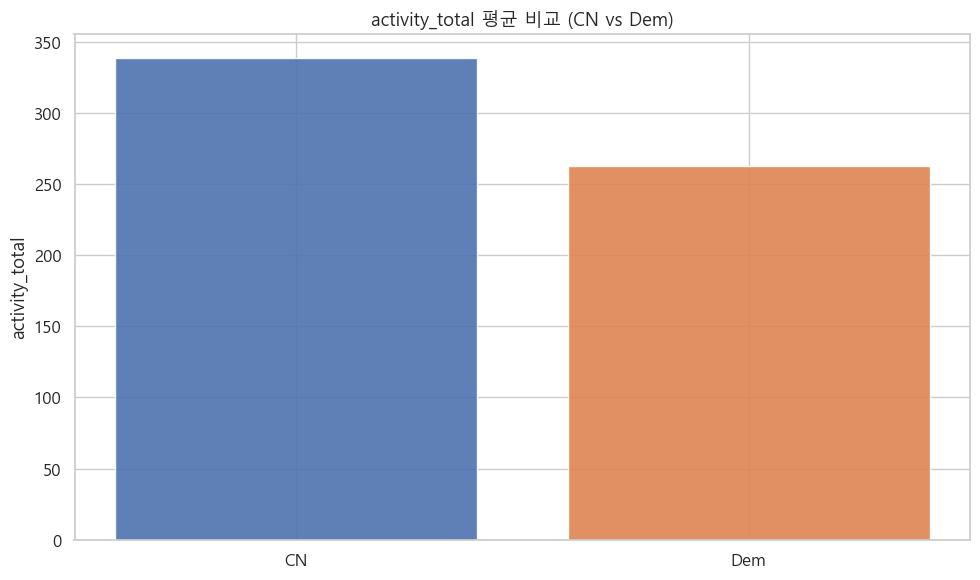

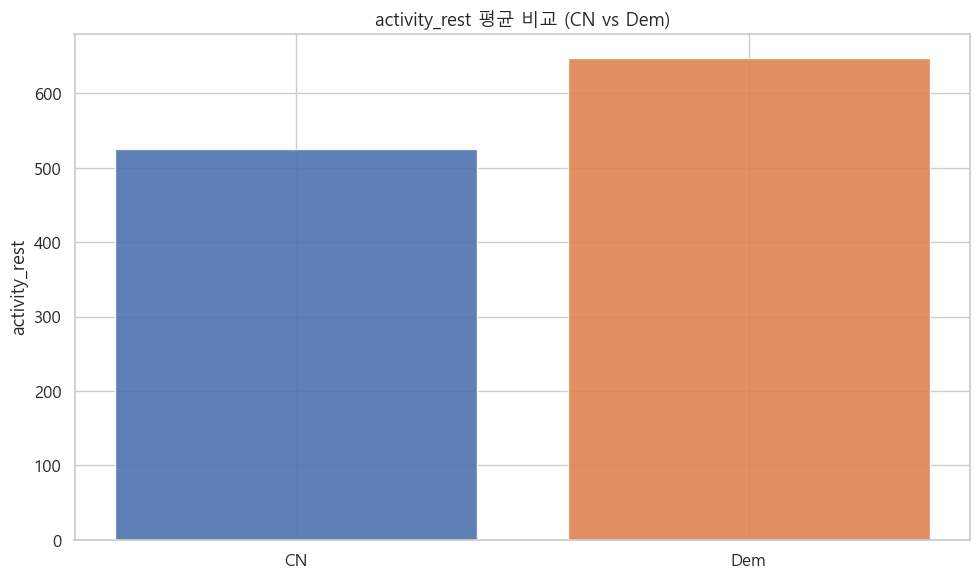

In [89]:
cols = ['activity_total', 'activity_rest']
view_bar2(all_df, cols, nums=140)

### CN과 Dem의 차이를 시각화

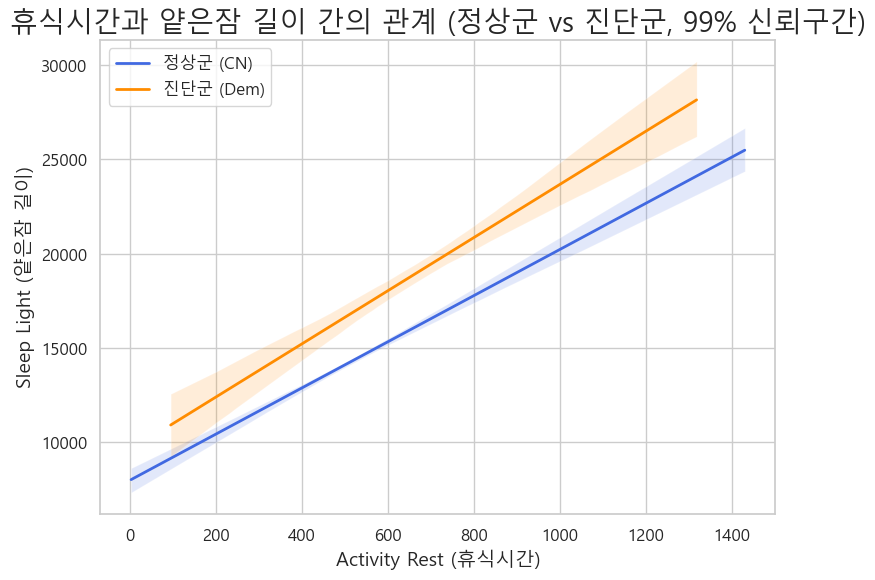

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ CN과 Dem 데이터 구분
cn_df = all_df[all_df['DIAG_NM'] == 'CN']
dem_df = all_df[all_df['DIAG_NM'] == 'Dem']

# ✅ 그래프 생성
plt.figure(figsize=(8, 6))

# 1️⃣ 정상군 (CN)
sns.regplot(
    data=cn_df, x="activity_rest", y="sleep_light",
    ci=99, scatter=False,
    line_kws={'color': 'royalblue', 'lw': 2, 'label': '정상군 (CN)'}
)

# 2️⃣ 진단군 (Dem)
sns.regplot(
    data=dem_df, x="activity_rest", y="sleep_light",
    ci=99, scatter=False,
    line_kws={'color': 'darkorange', 'lw': 2, 'label': '진단군 (Dem)'}
)

# ✅ 그래프 설정
plt.title("휴식시간과 얕은잠 길이 간의 관계 (정상군 vs 진단군, 99% 신뢰구간)", fontsize=20)
plt.xlabel("Activity Rest (휴식시간)", fontsize=14)
plt.ylabel("Sleep Light (얕은잠 길이)", fontsize=14)
# ✅ 범례 수동 설정
plt.legend(
    handles=[
        plt.Line2D([0], [0], color='royalblue', lw=2, label='정상군 (CN)'),
        plt.Line2D([0], [0], color='darkorange', lw=2, label='진단군 (Dem)')
    ],
    loc='best'
)
plt.tight_layout()
plt.show()


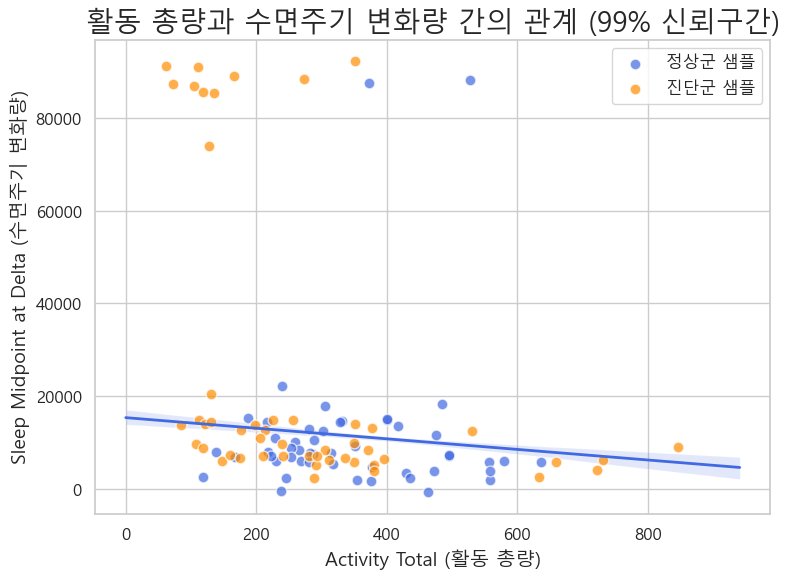

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# ✅ CN과 Dem 데이터를 구분
cn_df = all_df[all_df['DIAG_NM'] == 'CN']
dem_df = all_df[all_df['DIAG_NM'] == 'Dem']

# ✅ 샘플링 (각 그룹에서 5명씩)
sample_cn = cn_df.sample(n=min(50, len(cn_df)), random_state=42)
sample_dem = dem_df.sample(n=min(50, len(dem_df)), random_state=42)

# ✅ 하나의 그래프 생성
plt.figure(figsize=(8, 6))

# 1️⃣ 정상군 (CN) 추세선
sns.regplot(
    data=cn_df, x="activity_total", y="sleep_midpoint_at_delta",
    ci=99, scatter=False,
    line_kws={'color': 'royalblue', 'lw': 2, 'label': '정상군 (CN)'}
)
'''
# 2️⃣ 진단군 (Dem) 추세선
sns.regplot(
    data=dem_df, x="activity_total", y="sleep_midpoint_at_delta",
    ci=99, scatter=False,
    line_kws={'color': 'darkorange', 'lw': 2, 'label': '진단군 (Dem)'}
)
'''
# 3️⃣ 샘플링된 점 추가
plt.scatter(sample_cn["activity_total"], sample_cn["sleep_midpoint_at_delta"],
            color='royalblue', s=60, alpha=0.7, edgecolor='white', label='정상군 샘플')
plt.scatter(sample_dem["activity_total"], sample_dem["sleep_midpoint_at_delta"],
            color='darkorange', s=60, alpha=0.7, edgecolor='white', label='진단군 샘플')

# ✅ 그래프 설정
plt.title("활동 총량과 수면주기 변화량 간의 관계 (99% 신뢰구간)", fontsize=20)
plt.xlabel("Activity Total (활동 총량)", fontsize=14)
plt.ylabel("Sleep Midpoint at Delta (수면주기 변화량)" ,fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()
